#"Understanding Data" Assignment 1 Worked Examples

Aim - We aim to demonstrate worked examples related to "Understanding Data" Can in the use of SHAP analysis effectively distinguish the most influential features between different models?

Two datasets has been chosen to demonstrate Working examples

#Example-1)Data Scientist Salary
Salaries provided by Data Science companies dataset

#variables

Rating-
Rating provided by the employees working at the company

Company-
Name of the company

Average-
Average Salary in INR

Lowest-
Lowest Salary in INR

Highest-
Highest Salary in INR

yr/mo/hr-
Type of period


In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.6 MB/s eta 0:00:00


In [2]:
# Import Libraries
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
ds = pd.read_csv("https://raw.githubusercontent.com/Niharika-Santhoshini-Karri/Datasets/dd25782dd6c5b7f30c96e1163cc6194552ff4db3/ds_salaries.csv")

In [4]:
ds

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

In [5]:
ds.drop(ds[['salary','salary_currency']], axis = 1, inplace = True)

In [6]:
model = LinearRegression()

In [7]:
objList = ds.select_dtypes(exclude = "object").columns

In [8]:
objList

Index(['work_year', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [9]:
objList=objList.drop('salary_in_usd')

In [10]:
X, y = ds[objList],ds.salary_in_usd

In [11]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Fit a linear model and interpret the regression coefficients

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_p = model.predict(X_test)

In [15]:
pd.DataFrame(zip(X_train.columns, model.coef_))

0          1
0     work_year  88.736880
1  remote_ratio  -0.042823

In [16]:
print(model.coef_)

[ 8.87368796e+01 -4.28233105e-02]


#
ols method


In [17]:
import statsmodels.api as sm


#fit linear regression model
p = sm.OLS(y_train, X_train).fit()

#view model summary
print(p.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              7629.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        01:22:56   Log-Likelihood:                         -20859.
No. Observations:                3004   AIC:                                  4.172e+04
Df Residuals:                    3002   BIC:                                  4.173e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

The model's goodness of fit is assessed by the R-squared value, which shows that 83.4% of the variance in the dependent variable is explained by the independent variables. Both independent variables have statistically significant coefficients, as their p-values are less than the significance level of 0.05.

The coefficients of the independent variables show the direction and magnitude of their relationship with the dependent variable. For a one-unit increase in work_year, the dependent variable is expected to increase by 0.2880 units, holding all other variables constant. On the other hand, for a one-unit increase in remote_ratio, the dependent variable is expected to decrease by 0.4220 units, holding all other variables constant.

The Omnibus and Jarque-Bera tests are tests of normality, where low p-values suggest that the residuals may not be normally distributed. The Durbin-Watson test is a test for autocorrelation, where a value of 2 indicates no autocorrelation. In this case, the Omnibus and Jarque-Bera tests have low p-values, suggesting that the residuals may not be normally distributed, and the Durbin-Watson test value of 2.018 indicates no autocorrelation.

Finally, the AIC and BIC values are measures of model fit, where lower values indicate a better fit. The values here are relatively high, but this may be due to the inclusion of additional variables in the full model.

In [18]:
model.intercept_, model.coef_

(-178892.12628972938, array([ 8.87368796e+01, -4.28233105e-02]))

In [19]:
print(model.intercept_)

-178892.12628972938


In [20]:
# Fits the explainer
explainer = shap.explainers.Linear(model,X_train)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_train)

#Interpreting SHAP dependence plot for linear model:

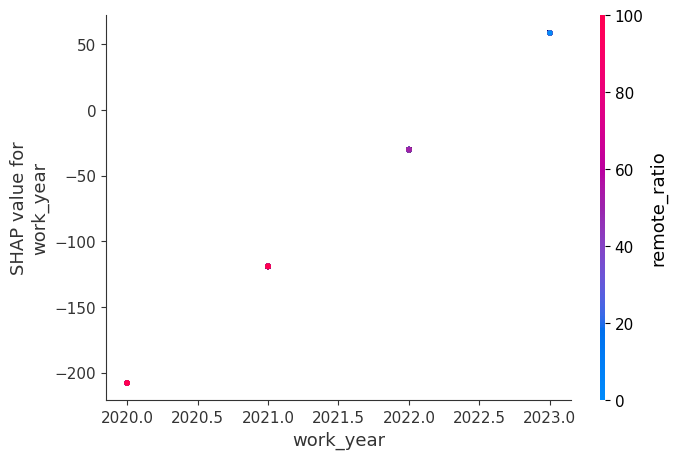

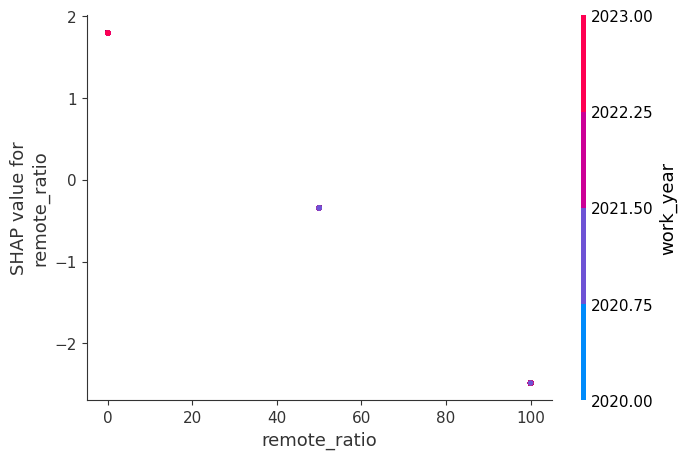

In [21]:
# SHAP partial dependence plot for linear model
for i in X_train.columns:
    shap.dependence_plot(i, shap_values.values, X_train)

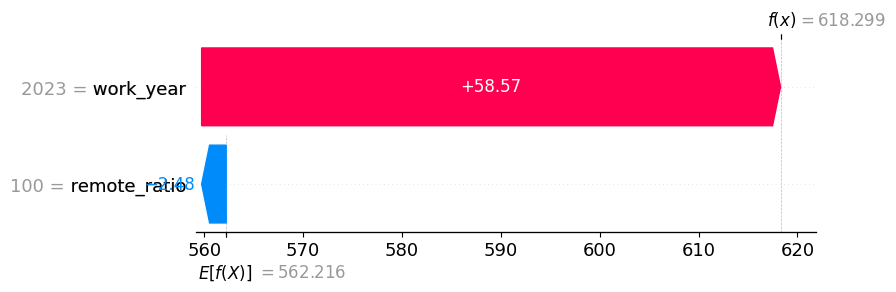

In [22]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

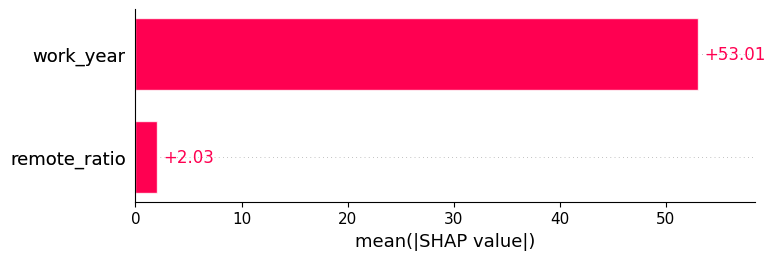

In [23]:
shap.plots.bar(shap_values)

The shap.plots.bar() method is used to create a bar plot of the SHAP values for all features in a dataset.

The shap_values variable contains the SHAP values for each feature in the dataset, where each row represents an instance in the data, and each column represents a feature. The shap.plots.bar() method takes in the SHAP values as input and generates a bar plot showing the mean absolute SHAP value for each feature across all instances in the dataset.

The bar plot can be useful in identifying which features have the most significant impact on the model's predictions. Features with a larger absolute mean SHAP value are more important in explaining the model's behavior for the dataset, as they contribute more to the model's predictions.

# SHAP summary for Linear Model

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


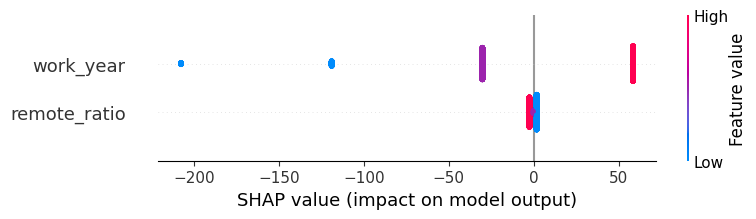

In [24]:
# SHAP summary for Linear Model
shap.summary_plot(shap_values, X_train)

#Fit a tree-based model and interpret the nodes

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
tree_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=10)
tree_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0)

In [26]:
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier, export_graphviz

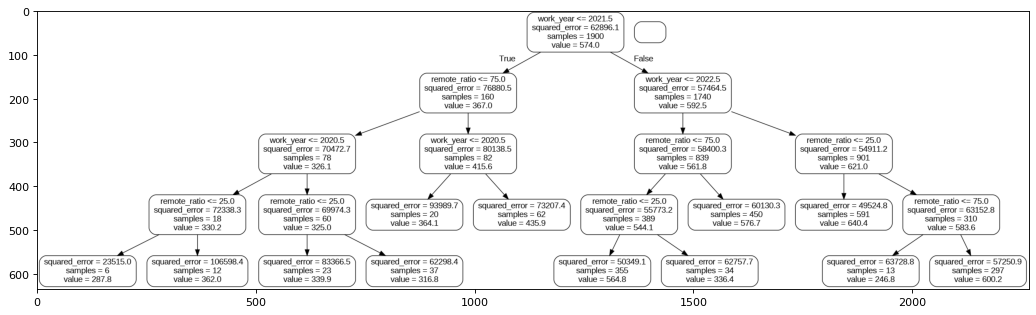

In [27]:
#Visualization of Nodes

figure(figsize=(16, 12), dpi=80)
tree= tree_model.estimators_[0]
export_graphviz(
tree,
out_file="tree.dot",
feature_names=list (X_train.columns),
rounded=True,
precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img=mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

In [28]:
tree.feature_importances_

array([0.65881508, 0.34118492])

<BarContainer object of 2 artists>

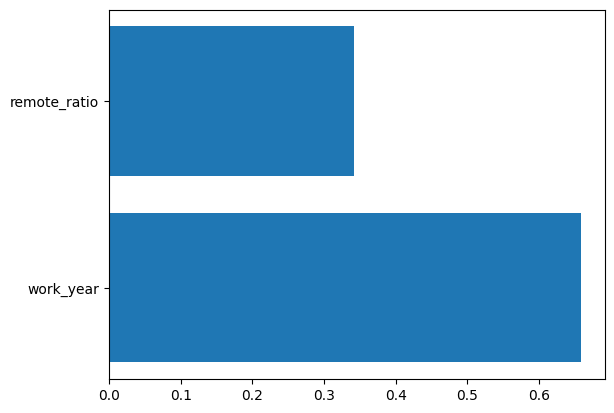

In [29]:
plt.barh(objList, tree.feature_importances_)

In [30]:
explain = shap.TreeExplainer(tree)
tree_shap_values = explain.shap_values(X_train)

[0.54523267 0.45476733]


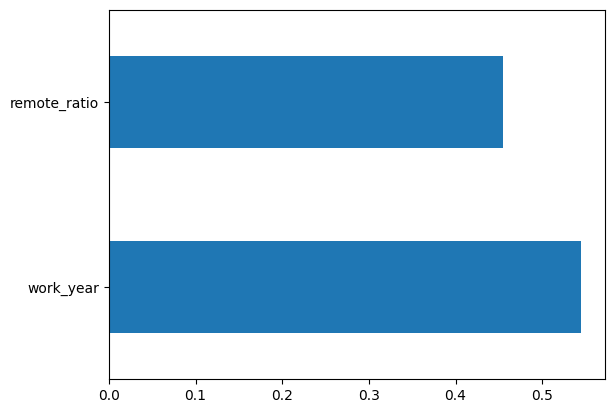

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
extra_model = ExtraTreesClassifier()
extra_model.fit(X_train,y_train)
print(extra_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(extra_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#Interpreting SHAP dependence plot for Tree-based model:

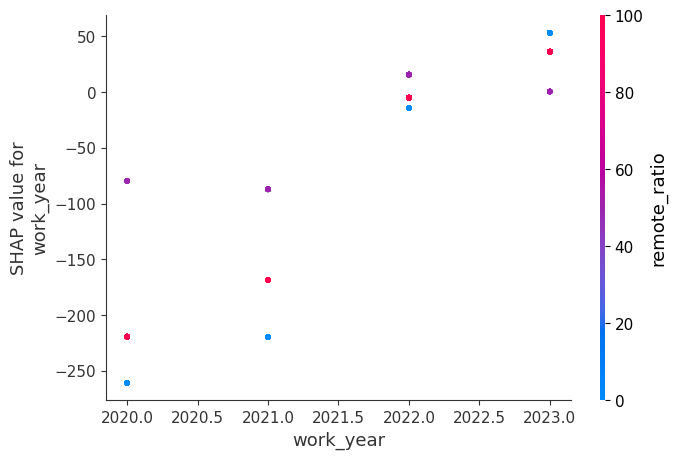

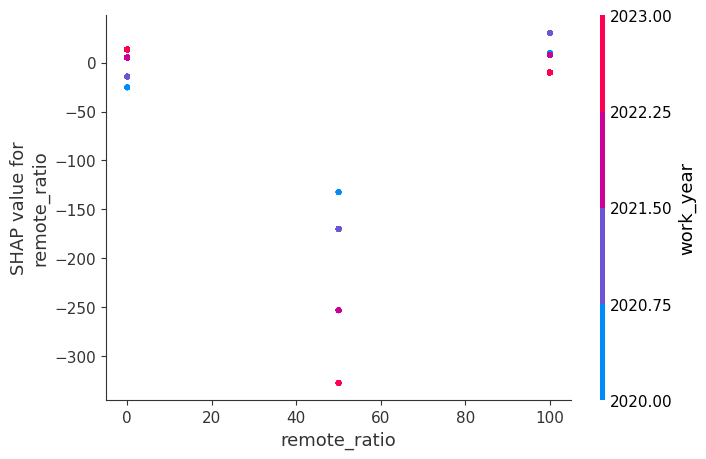

In [32]:
# SHAP partial dependence plot for a tree based model
for i in X_train.columns:
    shap.dependence_plot(i, tree_shap_values, X_train)

#Use auto ml to find the best model

In [33]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6
  libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6
  libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 18 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu

In [34]:
! pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=7fd1d11191d1a2e8378c44d429f216e86d24efe02cf73f9a36166968fb18021a
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o


In [35]:
# Import Libraries
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
h2o.cluster().show_status()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp26s69tvp
  JVM stdout: /tmp/tmp26s69tvp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp26s69tvp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         09 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    1 month and 10 days
H2O_cluster_name:           H2O_from_python_unknownUser_jdhyg1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         09 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    1 month and 10 days
H2O_cluster_name:           H2O_from_python_unknownUser_jdhyg1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [36]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         09 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    1 month and 10 days
H2O_cluster_name:           H2O_from_python_unknownUser_jdhyg1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [37]:
dk = h2o.import_file('https://raw.githubusercontent.com/Niharika-Santhoshini-Karri/Datasets/dd25782dd6c5b7f30c96e1163cc6194552ff4db3/ds_salaries.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [38]:
aml = H2OAutoML(max_models =25,balance_classes=True,seed =1)

In [39]:
train, test = dk.split_frame(ratios=[0.8], seed = 1)

In [40]:
aml.train(training_frame = train, y = 'salary_in_usd')

AutoML progress: |███████████████
01:26:39.953: DeepLearning_1_AutoML_1_20231003_12433 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_1_20231003_12433_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20231003_12433


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 3982613.0906891143
RMSE: 1995.6485388687845
MAE: 1118.8124119358795
RMSLE: 0.037154214300794776
Mean Residual Deviance: 3982613.0906891143
R^2: 0.999005311830657
Null degrees of freedom: 3017
Residual degrees of freedom: 3015
Null deviance: 12083712944569.49
Residual deviance: 12019526307.699747
AIC: 54438.61321515003

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 113636462.77110186
RMSE: 10660.040467610892
MAE: 2497.30292538838
RMSLE: 0.14234469782180376
Mean Residual Deviance: 113636462.77110186
R^2: 0.9716184217370613
Null degrees of freedom: 3017
Residual degrees of freedom: 3015
Null deviance: 12088996600553.07
Residual deviance: 342954844643.1854
AIC: 64552.13121974736

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     2530.41      472.437      2559.69       2089.57       3289.07       2532.61       2181.1
mean_residual_deviance  1.12905e+08  1.42663e+08  7.7762e+07    2.48795e+07   3.64953e+08   6.57028e+07   3.12276e+07
mse                     1.12905e+08  1.42663e+08  7.7762e+07    2.48795e+07   3.64953e+08   6.57028e+07   3.12276e+07
null_deviance           2.4178e+12   2.41235e+11  2.3153e+12    2.44885e+12   2.33045e+12   2.81427e+12   2.18013e+12
r2                      0.971141     0.0375048    0.979679      0.993649      0.904762      0.985934      0.991682
residual_deviance       6.83444e+10  8.66916e+10  4.7046e+10    1.55497e+10   2.21527e+11   3.94874e+10   1.8112e+10
rmse                    9320.77      5703.97      8818.28       4987.93       19103.8       8105.73       5588.17
rmsle                   0.138263     0.0407987    0.184392      0.0946704     0.17664       0.130462      0.105153

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

MSE (Mean Squared Error): It measures the average squared difference between the predicted and actual values of the target variable. In this case, the MSE value is 3982613.0907486016, which indicates that the model has an average squared error of 3982613.0907486016.

RMSE (Root Mean Squared Error): It is the square root of the MSE value and represents the standard deviation of the errors. The RMSE value is 1995.6485388836886, which means that the model's errors have a standard deviation of 1995.6485388836886.

MAE (Mean Absolute Error): It is the average absolute difference between the predicted and actual values of the target variable. In this case, the MAE value is 1118.812411955098, which means that the model has an average absolute error of 1118.812411955098.

RMSLE (Root Mean Squared Logarithmic Error): It is the square root of the average squared difference between the logarithm of the predicted and actual values of the target variable. The RMSLE value is 0.03715421430179527, which indicates that the model's errors are low and it is performing well.

Mean Residual Deviance: It measures the mean squared difference between the predicted and actual values of the target variable. In this case, the mean residual deviance value is 3982613.0907486016, which is the same as the MSE value.

R^2 (Coefficient of Determination): It represents the proportion of variance in the target variable that can be explained by the independent variables in the model. The R^2 value is 0.9990053118306422, which means that the model is able to explain 99.90% of the variance in the target variable.

Null degrees of freedom: It represents the number of observations in the data minus the number of independent variables in the model. In this case, the null degrees of freedom value is 3017.

Residual degrees of freedom: It represents the difference between the total number of observations and the number of independent variables in the model. In this case, the residual degrees of freedom value is 3015.

Null deviance: It measures the total sum of squared differences between the actual and mean values of the target variable. The null deviance value is 12083712944569.49.

Residual deviance: It measures the total sum of squared differences between the actual and predicted values of the target variable. The residual deviance value is 12019526307.87928.

AIC (Akaike Information Criterion): It is a measure of the model's goodness of fit and complexity. The AIC value is 54438.61321519512, which indicates that the model has a good fit and is not too complex.

In summary, based on the above values, it can be concluded that the model is performing well with low errors and high R^2 value, indicating a good fit to the data.







In [41]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                   rmse          mse       mae       rmsle    mean_residual_deviance
------------------------------------------------------  -------  -----------  --------  ----------  ------------------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20231003_12433  10660    1.13636e+08   2497.3     0.142345               1.13636e+08
GBM_grid_1_AutoML_1_20231003_12433_model_2              11053.2  1.22174e+08   3078.26  nan                      1.22174e+08
StackedEnsemble_AllModels_1_AutoML_1_20231003_12433     11075.9  1.22675e+08   2281.1   nan                      1.22675e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_30         11488.2  1.3198e+08    2586.1     0.150715               1.3198e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_29         11614.4  1.34895e+08   3720.19  nan                      1.34895e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_27         11746    1.37968e+08   3147.42  nan                      1.37968e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_13         11793.5  1.39086e+08   3101.12  nan                      1.39086e+08
GBM_4_AutoML_1_20231003_12433                           11797    1.3917e+08    2991.83    0.154917               1.3917e+08
GBM_5_AutoML_1_20231003_12433                           11842.1  1.40235e+08   2901.97    0.148912               1.40235e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_28         11867.3  1.40834e+08   2746.05  nan                      1.40834e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_21         11923.1  1.4216e+08    2809.35  nan                      1.4216e+08
XGBoost_2_AutoML_1_20231003_12433                       11941.1  1.4259e+08    2981.7   nan                      1.4259e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_19         12026.1  1.44626e+08   2116.12  nan                      1.44626e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_22         12030.2  1.44725e+08   4040.13  nan                      1.44725e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_2          12104    1.46506e+08   2590.67  nan                      1.46506e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_3          12117.1  1.46823e+08   2168.12  nan                      1.46823e+08
XGBoost_1_AutoML_1_20231003_12433                       12179.9  1.48349e+08   3197.18  nan                      1.48349e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_14         12242.5  1.4988e+08    1493.24    0.138508               1.4988e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_25         12347.6  1.52463e+08   2777.46  nan                      1.52463e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_15         12473.3  1.55583e+08   2639.4   nan                      1.55583e+08
GBM_grid_1_AutoML_1_20231003_12433_model_4              12476.6  1.55665e+08   3958     nan                      1.55665e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_23         12538.9  1.57224e+08   3075.87  nan                      1.57224e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_6          12560.6  1.57767e+08   3788.37  nan                      1.57767e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_20         12614.4  1.59124e+08   3005.78  nan                      1.59124e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_24         12652.3  1.6008e+08    3296.09  nan                      1.6008e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_17         12690.2  1.61041e+08   2894.17  nan                      1.61041e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_26         12718.5  1.6176e+08    2907.9   nan                      1.6176e+08
GBM_2_AutoML_1_20231003_12433                           12840    1.64867e+08   3921.91    0.192892               1.64867e+08
XGBoost_grid_1_AutoML_1_20231003_12433_model_4          12943.2  1.67527e+08   2810.2   nan                      1.67527e+08
GBM_3_AutoML_1_20231003_12433                           13057.7  1.70503e+08   3859.43    0.179031               1.70503e+08
GBM_gri

The model has been evaluated on several performance metrics such as root mean squared error (RMSE), mean squared error (MSE), mean absolute error (MAE), root mean squared logarithmic error (RMSLE), and mean residual deviance (MRD). The different models and their performance are listed in descending order based on their RMSE.

The StackedEnsemble_BestOfFamily_1_AutoML_1_20230425_22825 model has the lowest RMSE of 10660, which is the primary evaluation metric. The StackedEnsemble_AllModels_1_AutoML_1_20230425_22825 model also performed well with an RMSE of 11075.9.

The other models, including GBM, XGBoost, and their various grid search variations, had higher RMSE values, with XGBoost_grid_1_AutoML_1_20230425_22825_model_30 having the highest RMSE of 11488.2.

It is also notable that some of the models have NaN values for the RMSLE metric, indicating that there may be negative predicted values or zero actual values in the test set.

In [42]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20231003_12433


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 3982613.0906891143
RMSE: 1995.6485388687845
MAE: 1118.8124119358795
RMSLE: 0.037154214300794776
Mean Residual Deviance: 3982613.0906891143
R^2: 0.999005311830657
Null degrees of freedom: 3017
Resi

MSE: 3982613.0907486016 - The average squared difference between the predicted and actual values of the target variable. Lower values indicate better model performance.
RMSE: 1995.6485388836886 - The square root of MSE. It represents the average difference between the predicted and actual values of the target variable. Lower values indicate better model performance.
MAE: 1118.812411955098 - The average absolute difference between the predicted and actual values of the target variable. Lower values indicate better model performance.
RMSLE: 0.03715421430179527 - The root mean squared logarithmic error. It penalizes underestimation more than overestimation. Lower values indicate better model performance.
Mean Residual Deviance: 3982613.0907486016 - A measure of how well the model fits the data. Lower values indicate better model performance.
R^2: 0.9990053118306422 - The proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating better model performance. In this case, the model explains 99.9% of the variance in the target variable.
Null degrees of freedom: 3017 - The number of observations used to fit the null model
Residual degrees of freedom: 3015 - The number of observations used to fit the model minus the number of model parameters.
Null deviance: 12083712944569.49 - The deviance of the null model. It represents the sum of squared differences between the actual and the mean of the target variable.
Residual deviance: 12019526307.87928 - The deviance of the fitted model. It represents the sum of squared differences between the actual and predicted values of the target variable.
AIC: 54438.61321519512 - Akaike Information Criterion (AIC) is a measure of the relative quality of the statistical model for a given set of data. Lower values indicate better model performance.
In summary, the given model has very low values for MSE, RMSE, MAE, and RMSLE, which indicates that the model fits the data very well. The R^2 value is very high, indicating that the model explains most of the variance in the target variable. The AIC value is also relatively low, indicating a good fit for the model.







In [43]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 43355186.53684581
RMSE: 6584.465546788579
MAE: 2055.44764133379
RMSLE: 0.14665296588221963
Mean Residual Deviance: 43355186.53684581
R^2: 0.98875760245796
Null degrees of freedom: 736
Residual degrees of freedom: 734
Null deviance: 2842252388802.538
Residual deviance: 31952772477.65536
AIC: 15059.61389127539

The model seems to have performed well, as evidenced by the high value of R-squared (0.9887576024580301), which indicates that 98.9% of the variation in the dependent variable is explained by the independent variable(s). Additionally, the RMSE (Root Mean Squared Error) value of 6584.465546768027 indicates that the average error made by the model in predicting the dependent variable is around 6584.4 units. The MAE (Mean Absolute Error) of 2055.4476413493003 also indicates that the average absolute difference between the predicted and actual values is around 2055.4 units.

The RMSLE (Root Mean Squared Logarithmic Error) value of 0.14665296588247262 indicates the performance of the model in predicting the logarithmic values of the dependent variable.

The values for Mean Residual Deviance, Null Deviance, and Residual Deviance give an indication of the goodness of fit of the model, with lower values indicating a better fit. The AIC (Akaike Information Criterion) value of 15059.613891270788 is used for model selection, with lower values indicating a better fit.

Overall, the model seems to have performed well based on these values, but it's important to assess the model's performance on unseen data to confirm its effectiveness.

In [44]:
best_model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
---------
  28267.1
 145833
 109217
 106108
 106631
 180352
 123403
 111030
 239285
 235327
[737 rows x 1 column]

In [45]:
# Setting up AutoML
def autoML(df_train, df_test):
    X = df_train.columns
    y = "salary_in_usd"

    X.remove(y)  # Removing the result frm our predictors data
    #X.remove("salary_in_usd")  # Removing ID from the predictor's data, as it is not related

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml



In [46]:
# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model


In [47]:
autoML = autoML(train, test)  # Training AutoML

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [48]:
autoML_model = getBestModel(autoML[2])

3


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

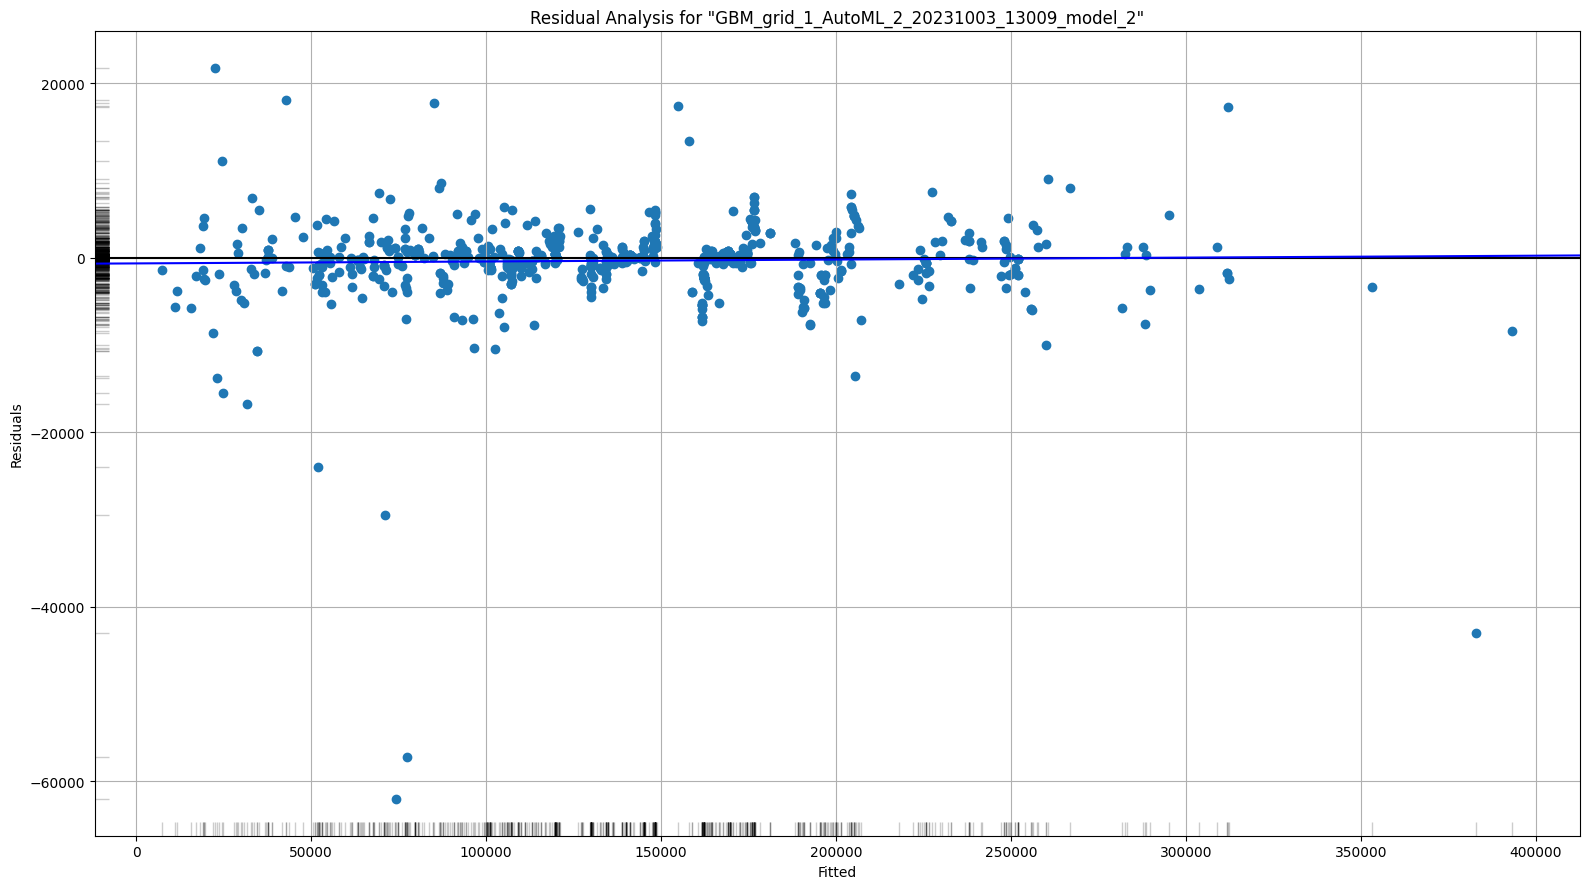

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

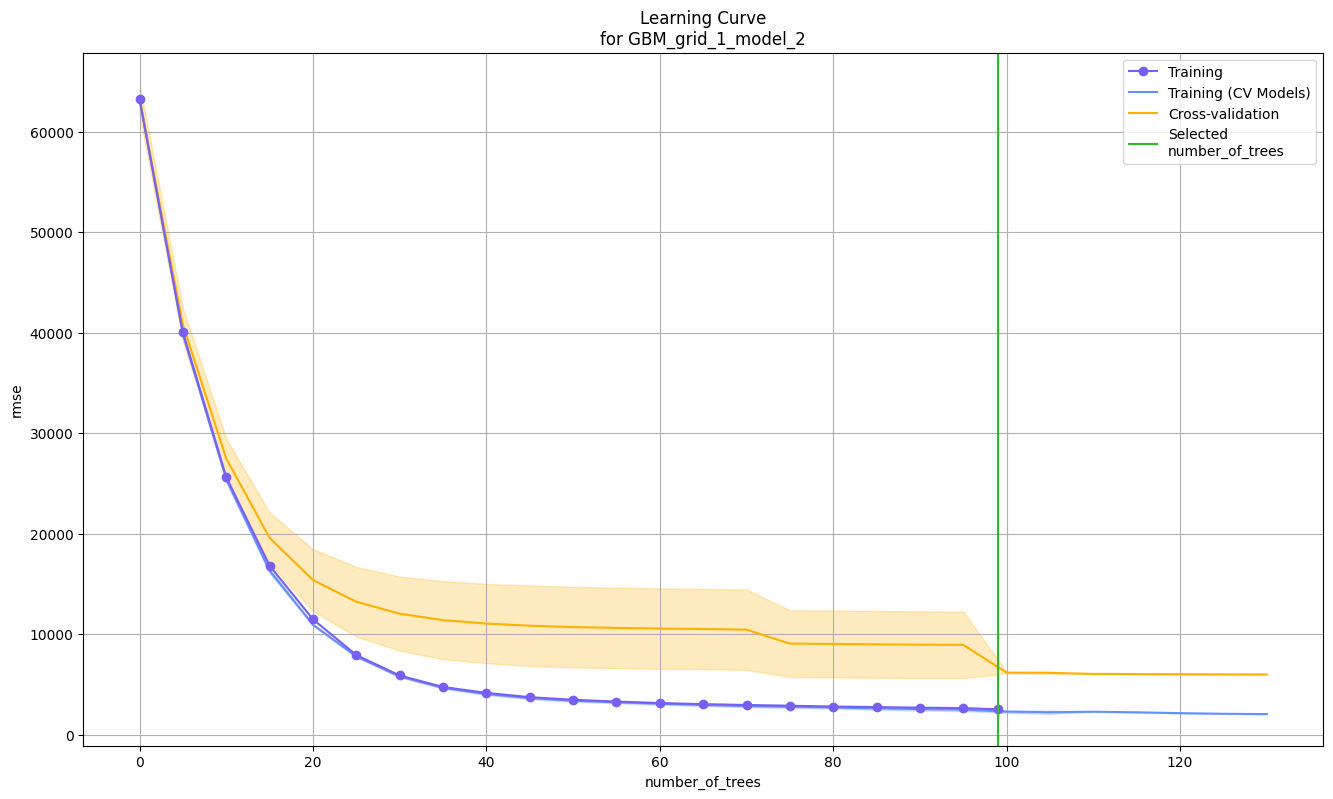

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

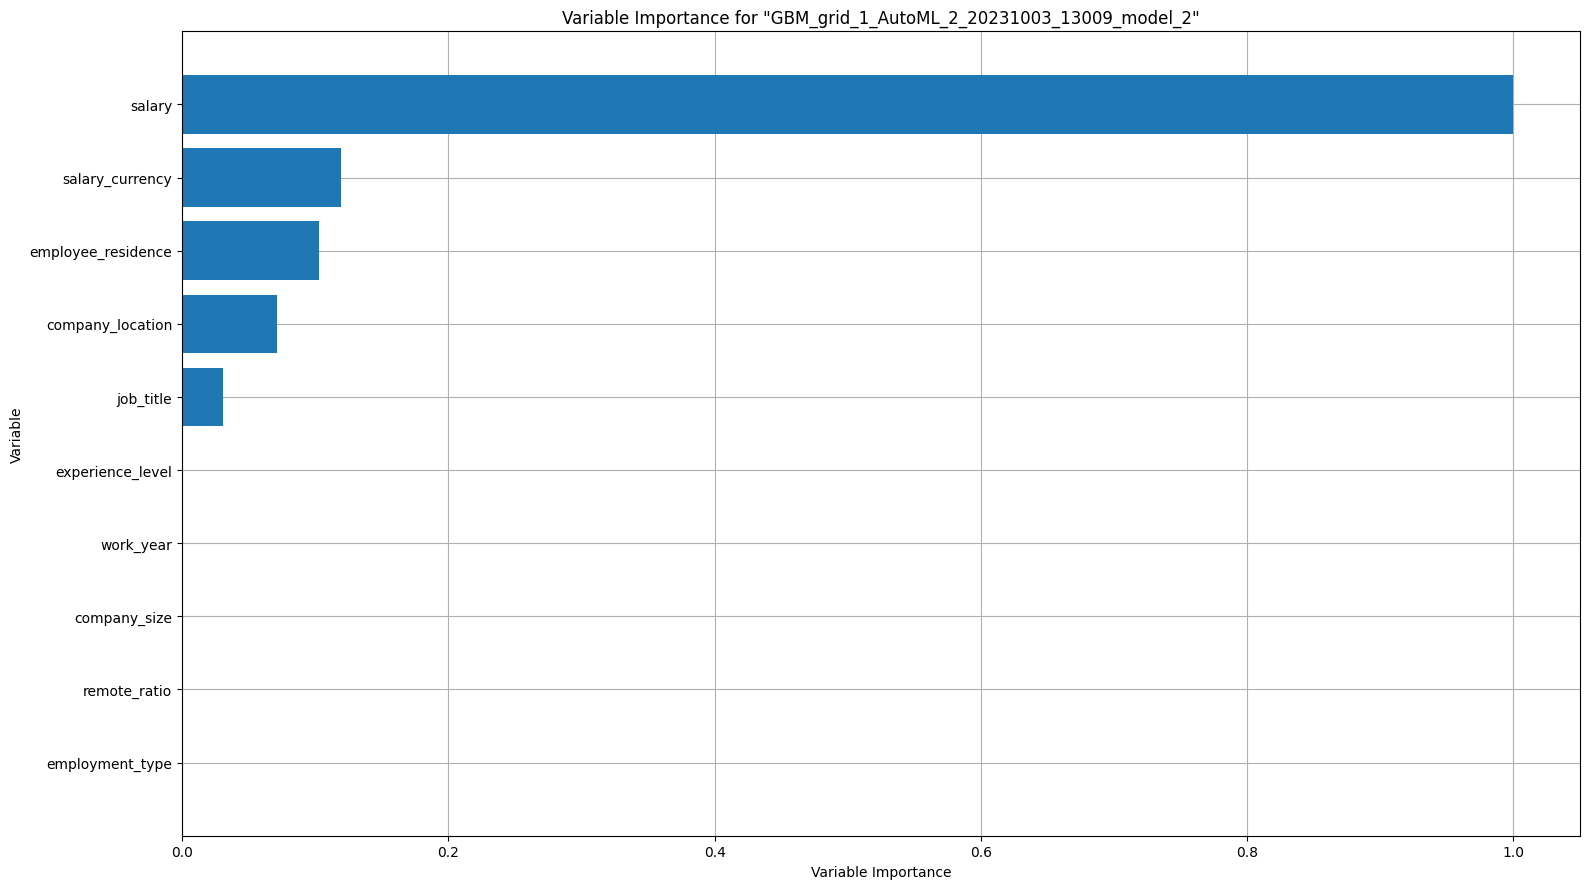

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

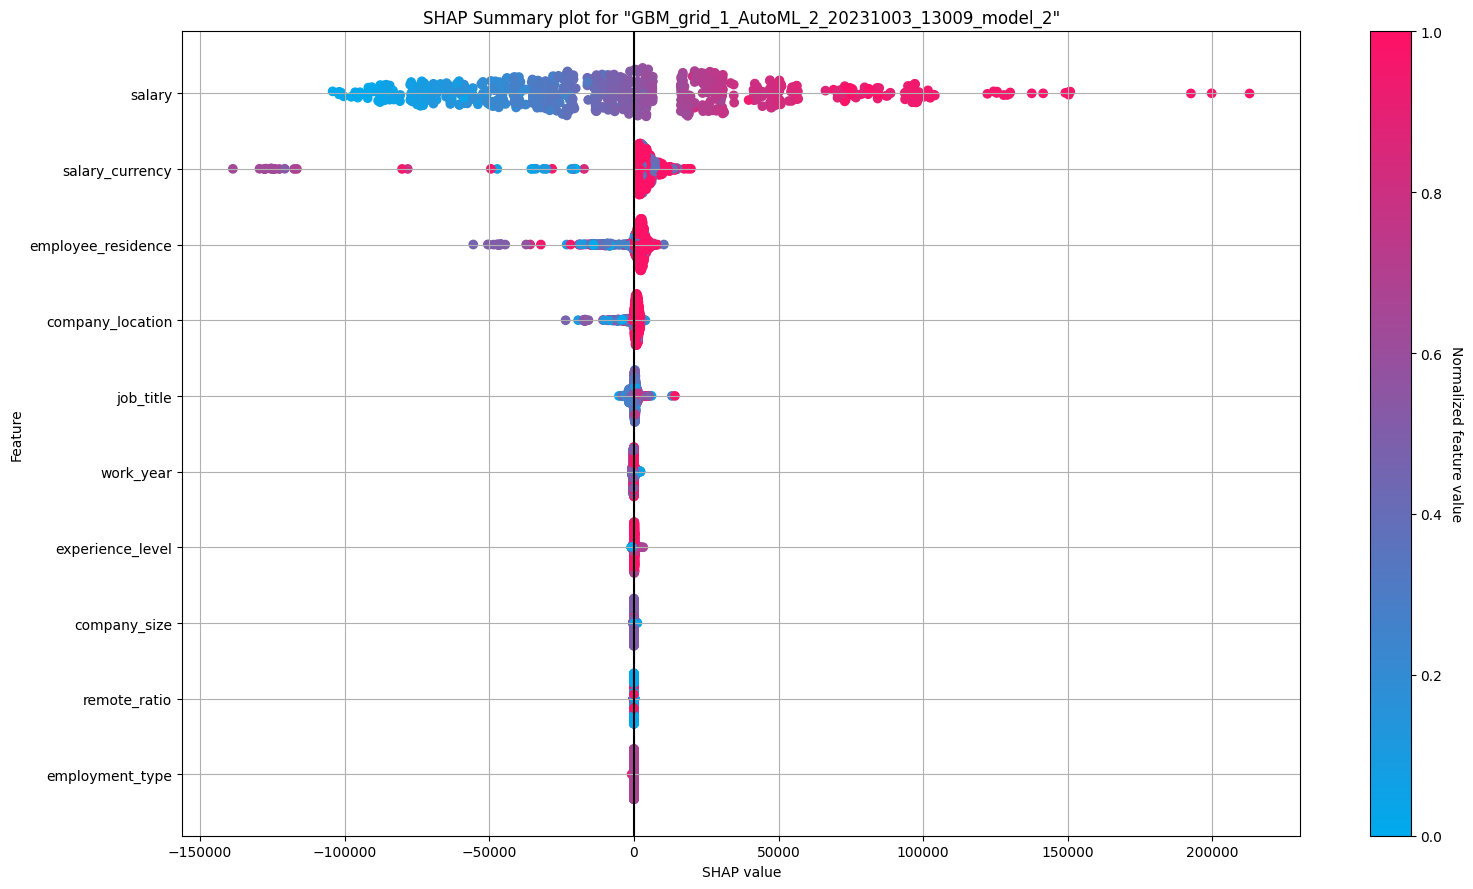

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

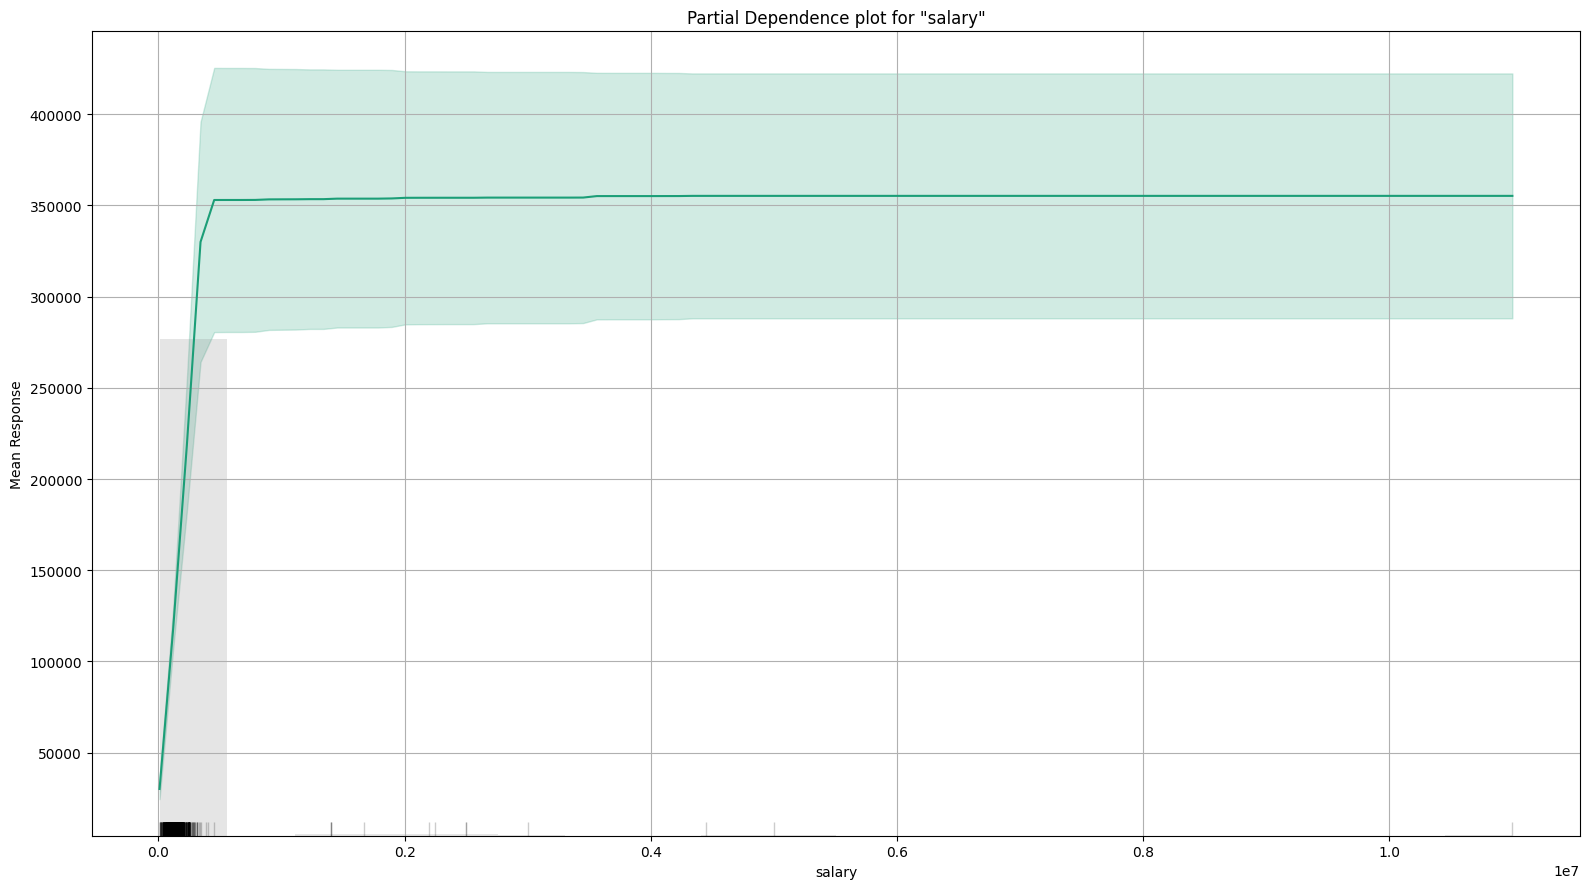

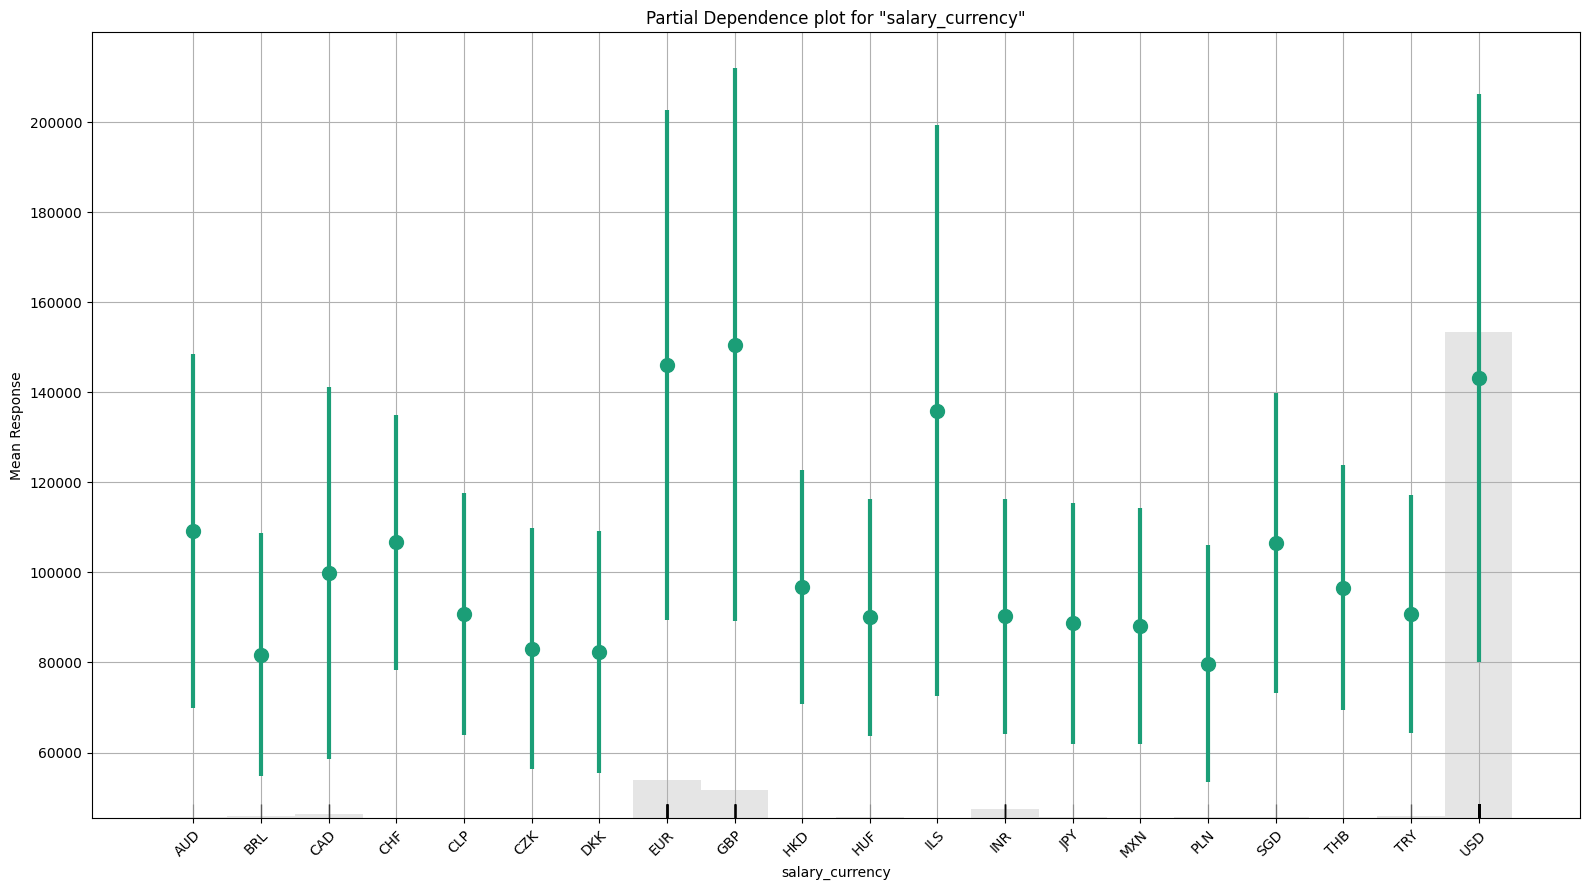

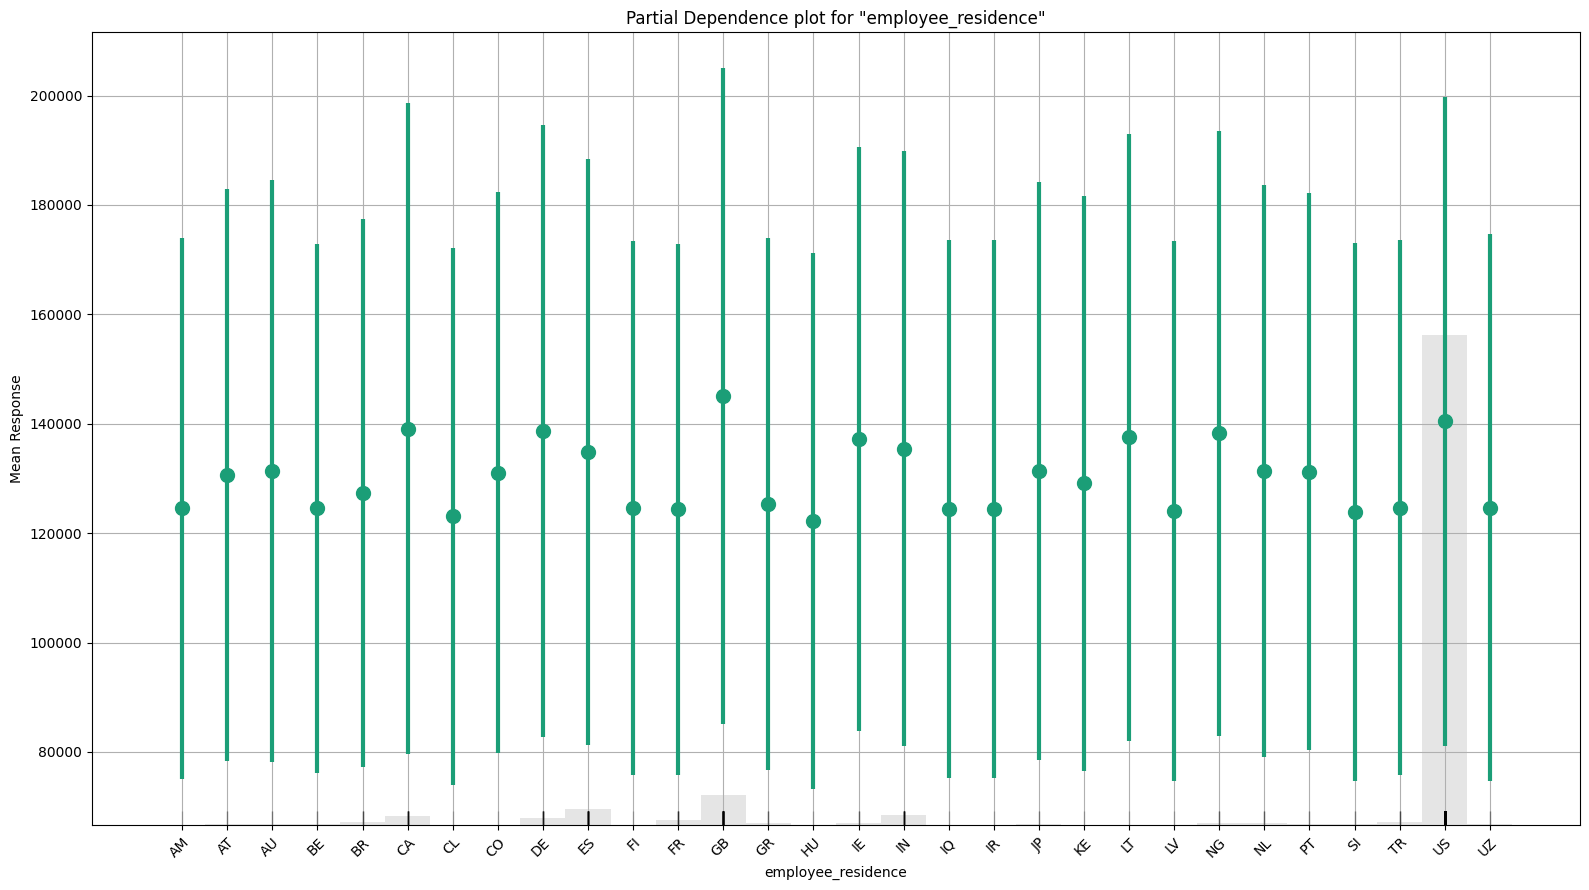

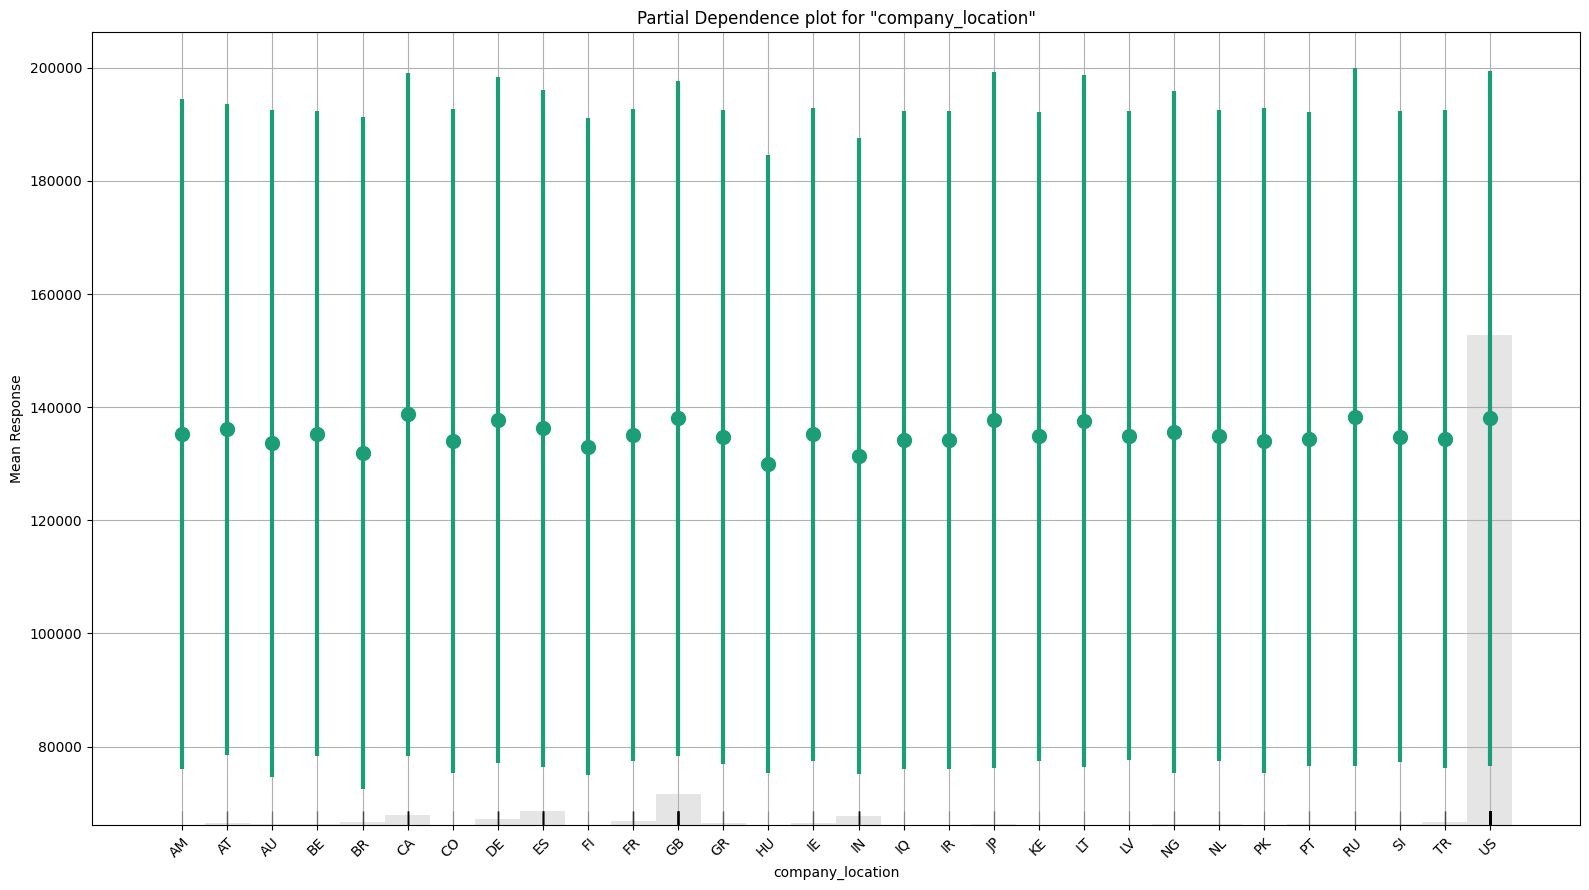

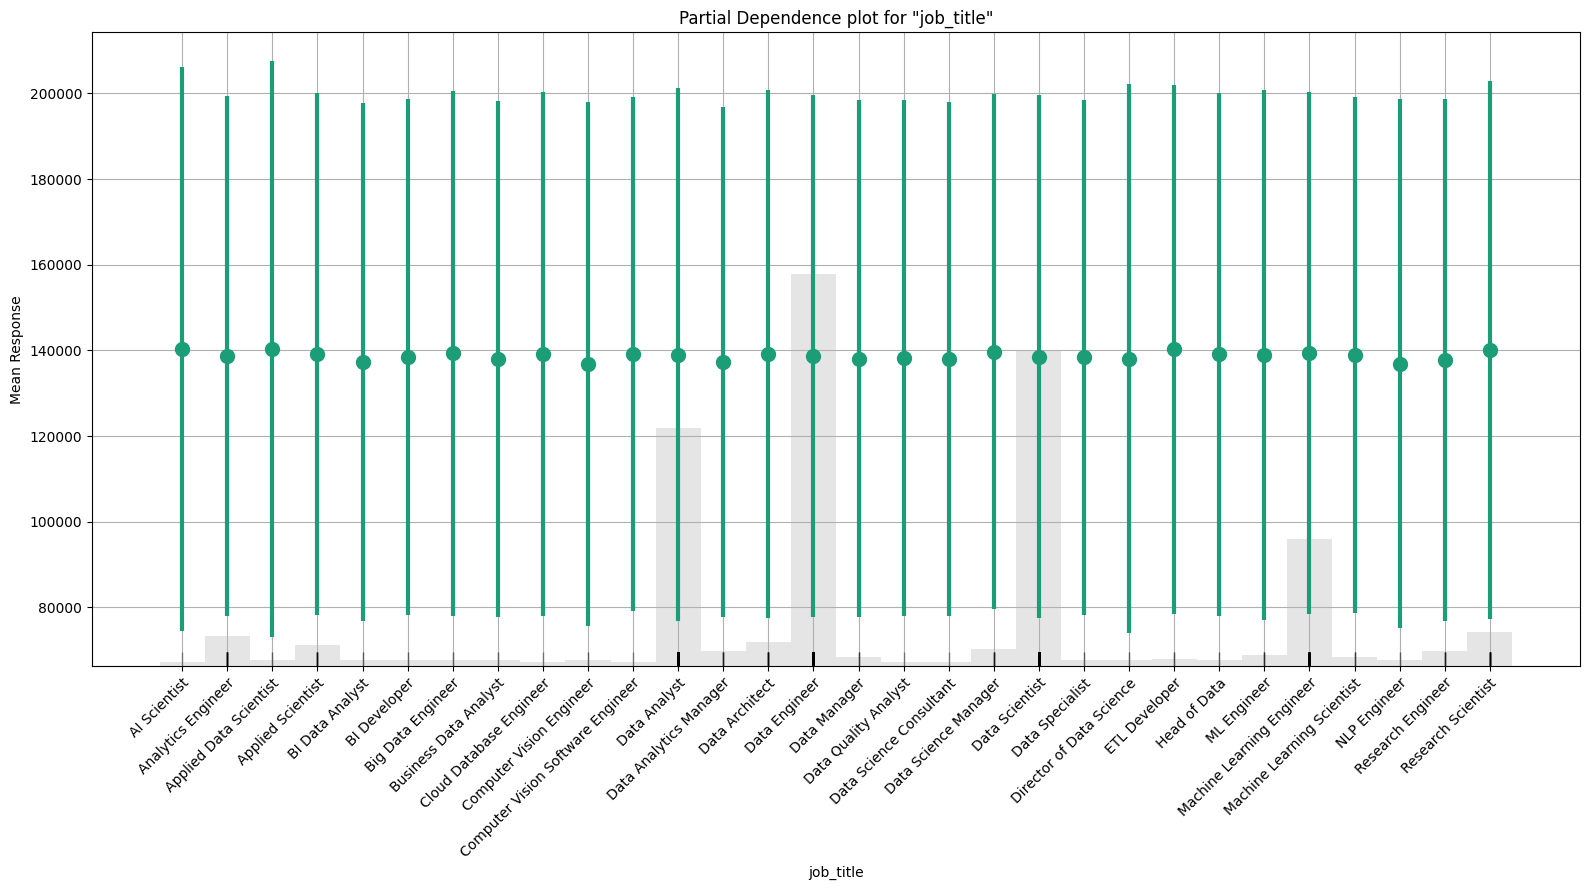

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

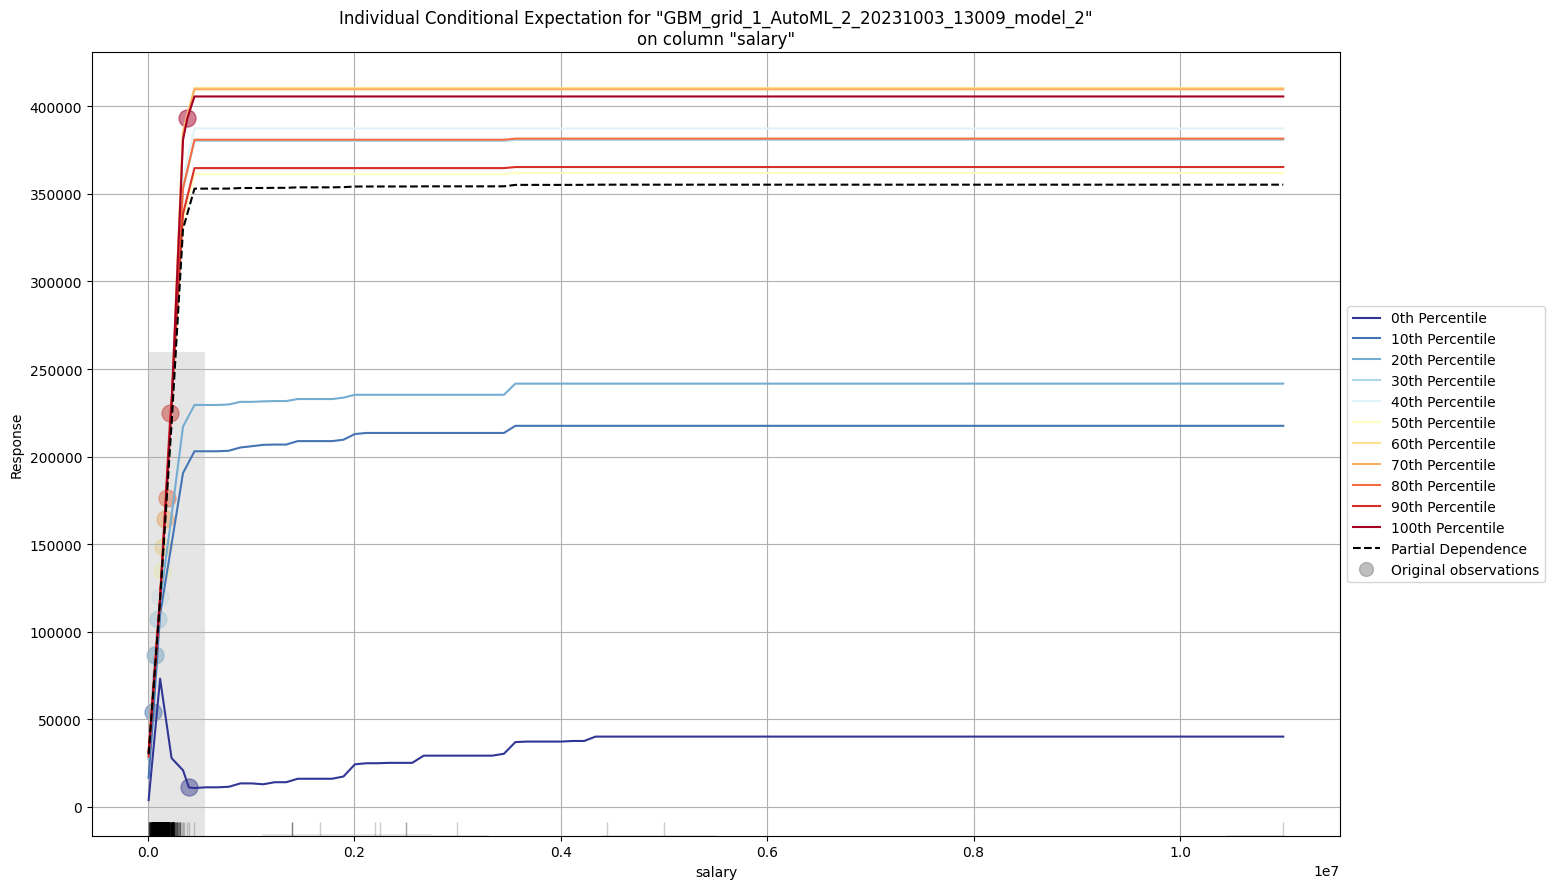

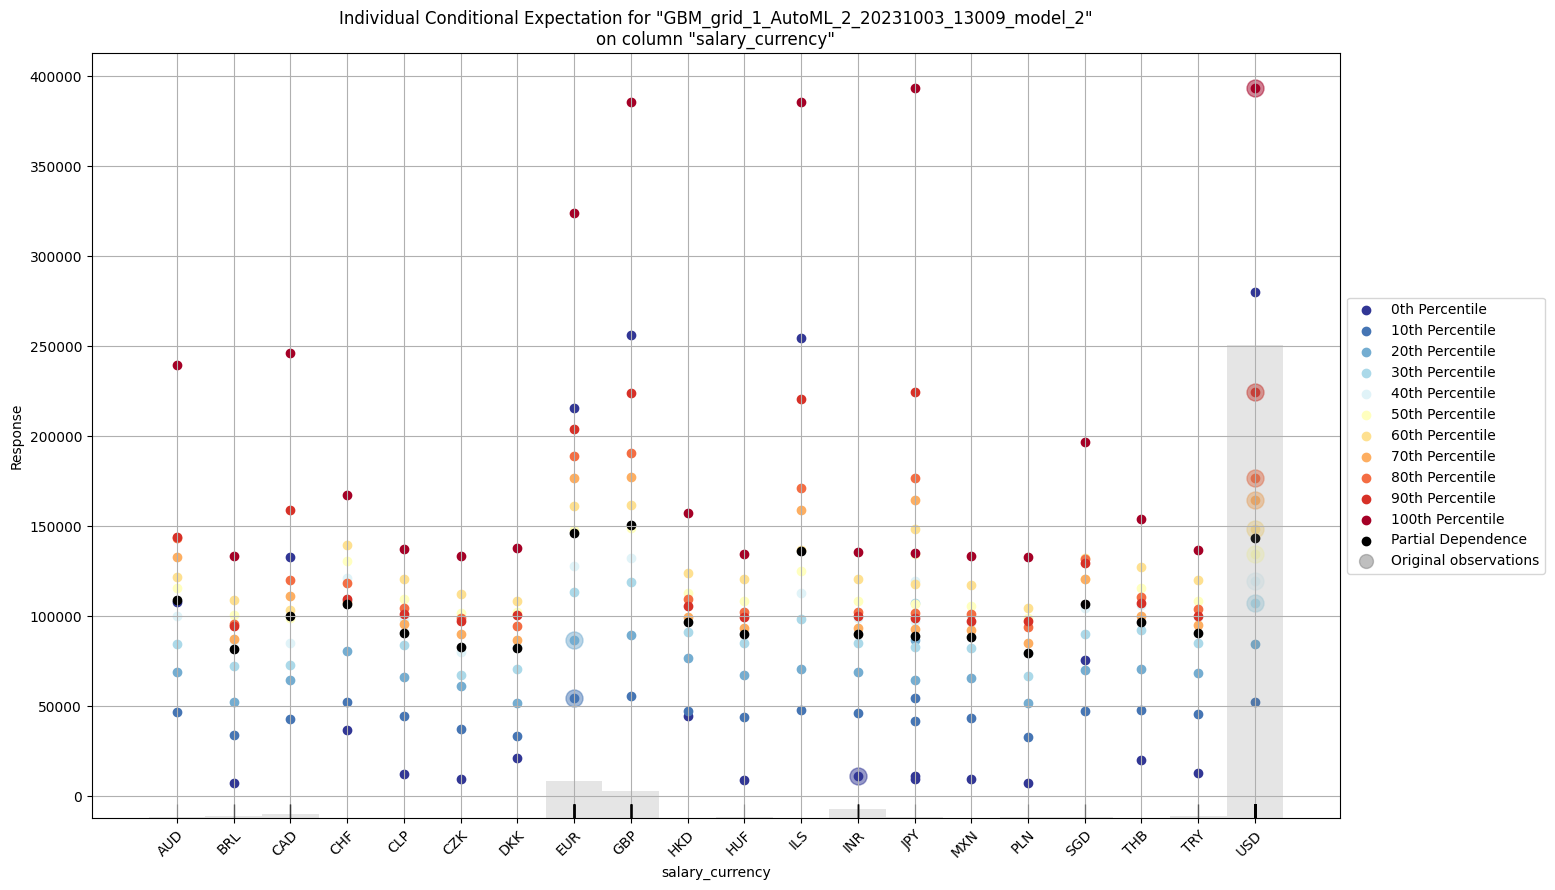

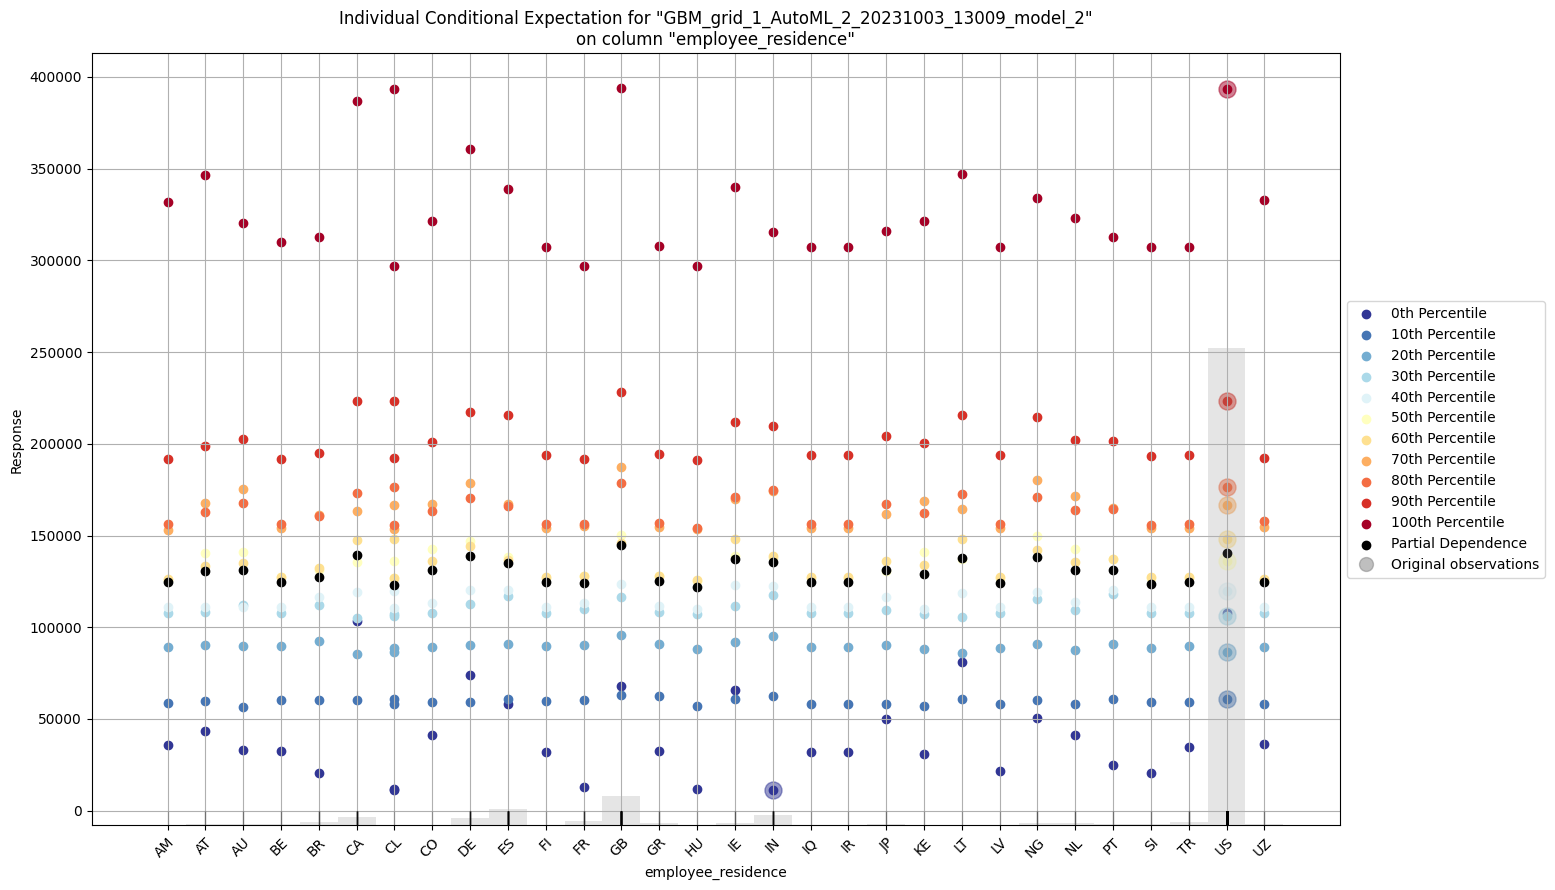

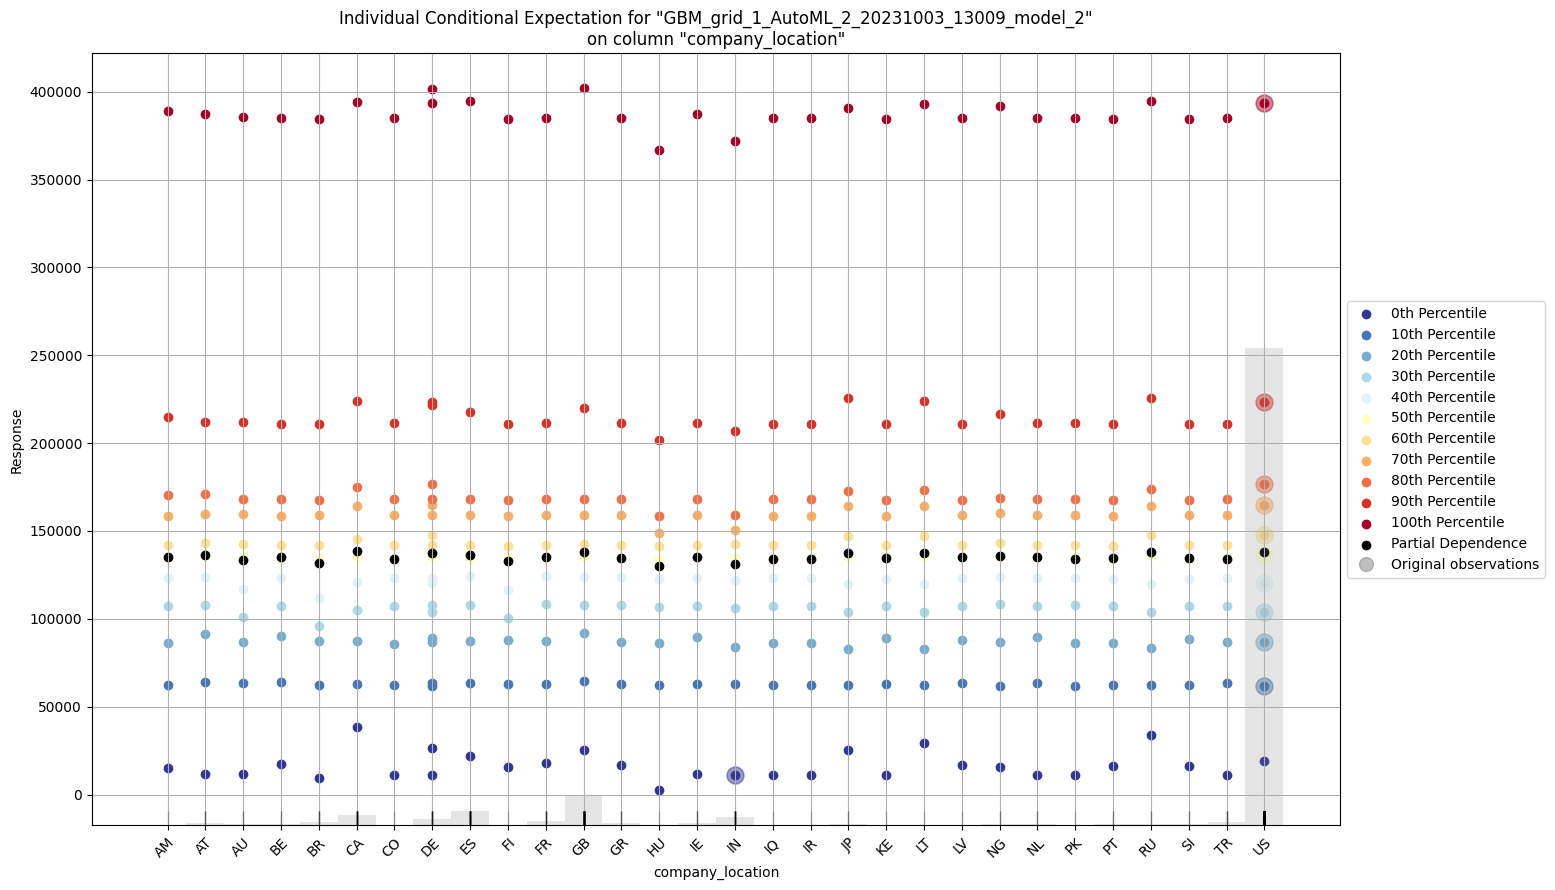

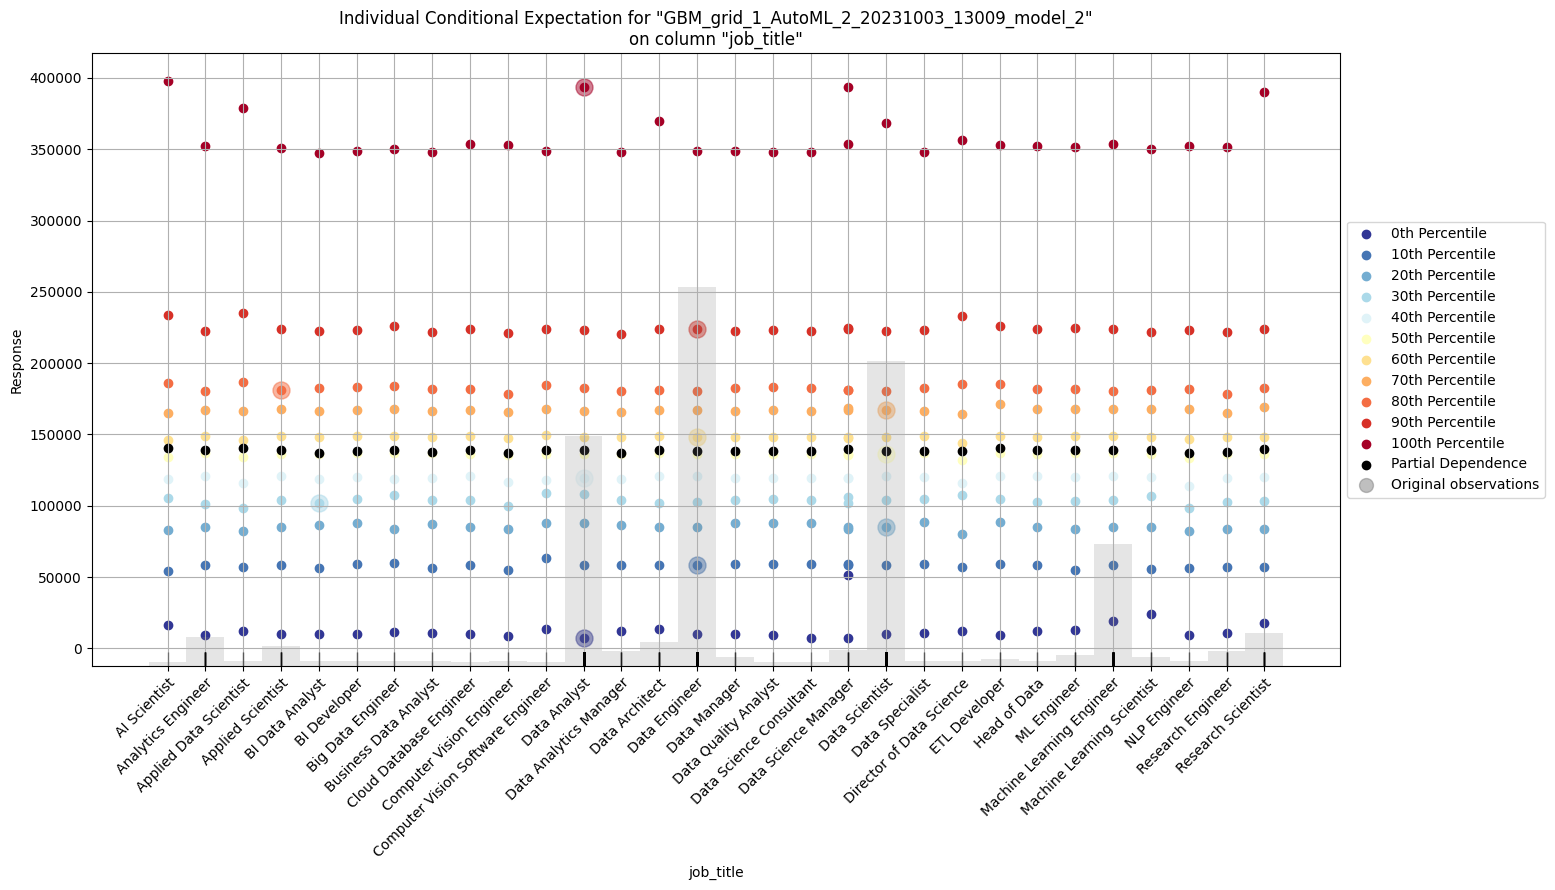

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [49]:
autoML_model.explain(autoML[1])

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse          mse      mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo               predict
------------------------------------------------------  -------  -----------  -------  --------  ------------------------  ------------------  -------------------------  ---------------  ---------
GBM_4_AutoML_1_20231003_12433                           4802.48  2.30638e+07  2047.68  0.127907               2.30638e+07                 905                   0.040098  GBM                28099.4
GBM_grid_1_AutoML_1_20231003_12433_model_2              5098.8   2.59977e+07  2474.77  0.122473               2.59977e+07                 464                   0.039696  GBM                30667.8
GBM_3_AutoML_1_20231003_12433                           5553.34  3.08396e+07  2714.55  0.148843               3.08396e+07                 911                   0.033031  GBM                30483.7
GBM_5_AutoML_1_20231003_12433                           5563.15  3.09486e+07  2104.73  0.133356               3.09486e+07                 570                   0.044827  GBM                25058.1
StackedEnsemble_AllModels_1_AutoML_1_20231003_12433     6143.2   3.77389e+07  1762.5   0.15446                3.77389e+07                5041                   0.388091  StackedEnsemble    30392.3
GBM_2_AutoML_1_20231003_12433                           6316.44  3.98974e+07  2872.71  0.14984                3.98974e+07                 965                   0.073535  GBM                35490.5
StackedEnsemble_BestOfFamily_1_AutoML_1_20231003_12433  6584.47  4.33552e+07  2055.45  0.146653               4.33552e+07                3177                   0.062298  StackedEnsemble    28267.1
XGBoost_grid_1_AutoML_1_20231003_12433_model_13         7103.57  5.04606e+07  2370.44  0.164529               5.04606e+07                2486                   0.005306  XGBoost            31203
XGBoost_grid_1_AutoML_1_20231003_12433_model_24         7565.82  5.72417e+07  2235.75  0.160493               5.72417e+07                 497                   0.006266  XGBoost            26958.3
GBM_grid_1_AutoML_1_20231003_12433_model_1              7872.05  6.19692e+07  3690.17  0.18385                6.19692e+07                1676                   0.08789   GBM                34436.3
[20 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

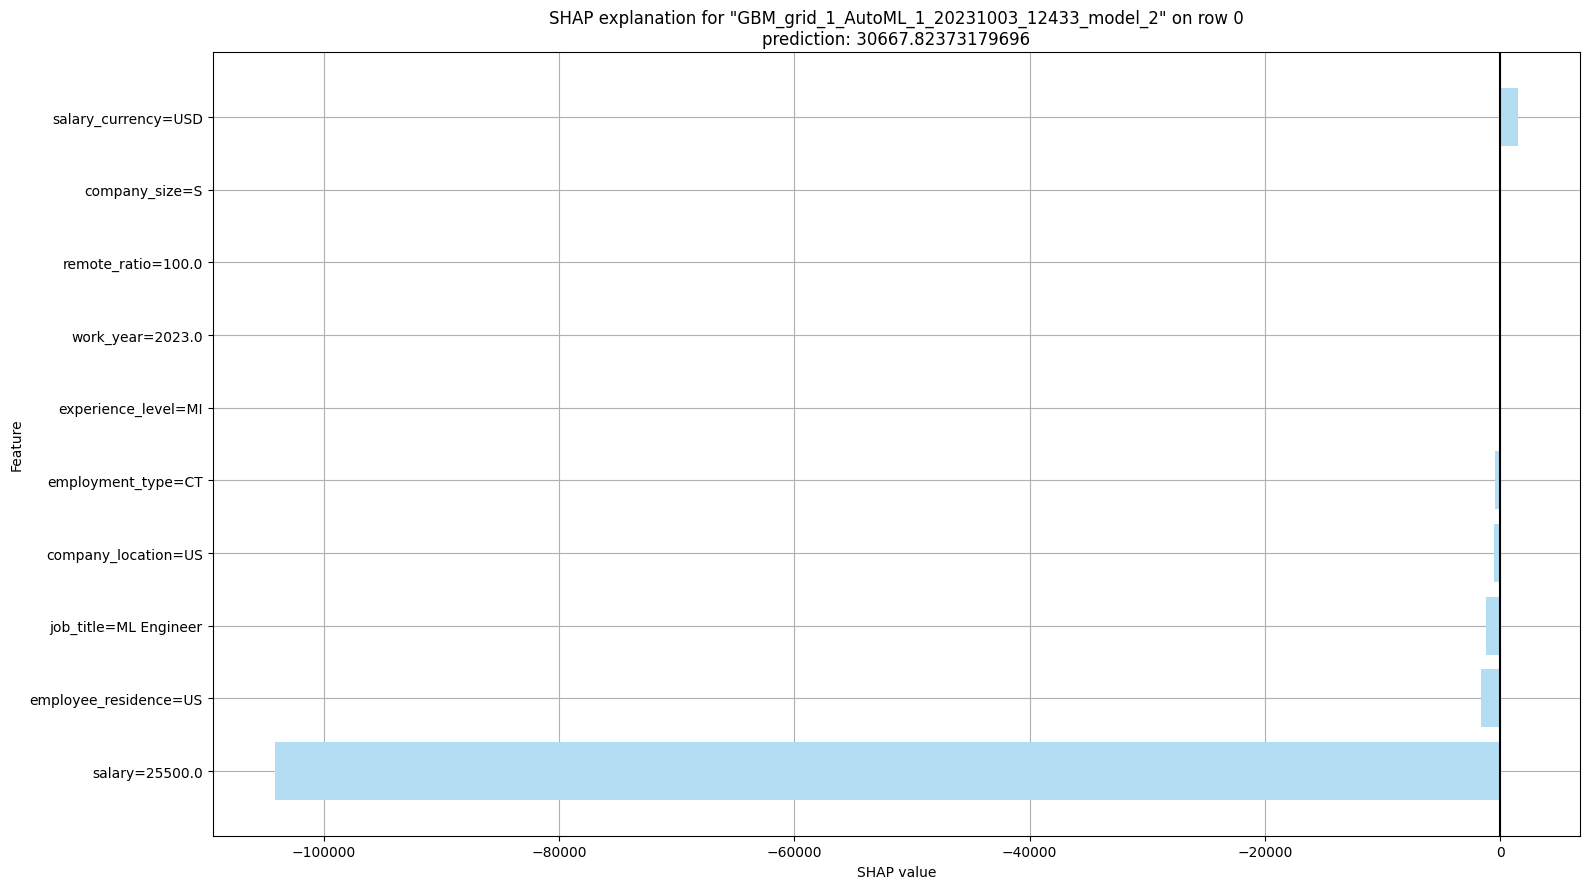

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse          mse      mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo               predict
------------------------------------------------------  -------  -----------  -------  --------  ------------------------  ------------------  -------------------------  ---------------  ---------
GBM_4_AutoML_1_20231003_12433                           4802.48  2.30638e+07  2047.68  0.127907               2.30638e+07                 905                   0.040098  GBM                28099.4
GBM_grid_1_AutoML_1_20231003_12433_model_2              5098.8   2.59977e+07  2474.77  0.122473               2.59977e+07                 464                   0.039696  GBM                30667.8
GBM_3_AutoML_1_20231003_12433                           5553.34  3.08396e+07  2714.55  0.148843               3.08396e+07                 911                   0.033031  GBM                30483.7
GBM_5_AutoML_1_20231003_12433                           5563.15  3.09486e+07  2104.73  0.133356               3.09486e+07                 570                   0.044827  GBM                25058.1
StackedEnsemble_AllModels_1_AutoML_1_20231003_12433     6143.2   3.77389e+07  1762.5   0.15446                3.77389e+07                5041                   0.388091  StackedEnsemble    30392.3
GBM_2_AutoML_1_20231003_12433                           6316.44  3.98974e+07  2872.71  0.14984                3.98974e+07                 965                   0.073535  GBM                35490.5
StackedEnsemble_BestOfFamily_1_AutoML_1_20231003_12433  6584.47  4.33552e+07  2055.45  0.146653               4.33552e+07                3177                   0.062298  StackedEnsemble    28267.1
XGBoost_grid_1_AutoML_1_20231003_12433_model_13         7103.57  5.04606e+07  2370.44  0.164529               5.04606e+07                2486                   0.005306  XGBoost            31203
XGBoost_grid_1_AutoML_1_20231003_12433_model_24         7565.82  5.72417e+07  2235.75  0.160493               5.72417e+07                 497                   0.006266  XGBoost            26958.3
GBM_grid_1_AutoML_1_20231003_12433_model_1              7872.05  6.19692e+07  3690.17  0.18385                6.19692e+07                1676                   0.08789   GBM                34436.3
[20 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [50]:
aml.explain_row(test, row_index=0)

In [51]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree

In [52]:
# fit model no training data
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

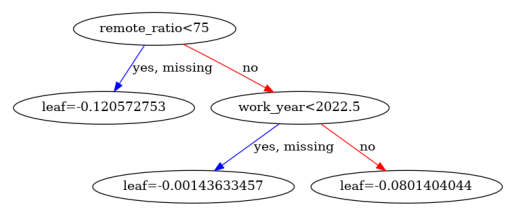

In [53]:
# plot single tree
plot_tree(model)
plt.show()

A higher leaf value i.e; leaf = 0.12025 indicates that instances assigned to that leaf node tend to have higher values of the target variable. This might suggest that the feature(s) used to split the tree leading to that leaf node are strongly correlated with the target variable.
A lower leaf value i.e; 0.0014 indicates that instances assigned to that leaf node tend to have lower values of the target variable. This might suggest that the feature(s) used to split the tree leading to that leaf node are weakly correlated with the target variable, or that there is some noise or variability in the data.

#CONCLUSION:

Using the binomial GLM metric to measure performance on a binary classification test, AutoML chooses the Stacked Ensemble model as the top model.One Deep Learning model and one GLM model with a GLM metalearner make up the Stacked Ensemble model, which is an ensemble of two basic models. One of the reasons it was selected as the best model is that it has a low RMSE value in comparison to others.

The Stacked Ensemble model is the best method for combining the predictions of various models for the particular job at hand, according to the automated process. Several models are trained on the same dataset to create the stacked ensemble model, which then combines the predictions of all the trained models to provide a single forecast. When used together, such as averaging the predictions, using a weighted average, or using a more complex meta-model to make the final prediction.


The advantage of a stacked ensemble model is that it can potentially outperform individual models by leveraging the strengths of different models and minimizing their weaknesses. However, it is important to note that building and training a stacked ensemble model can be more complex and computationally expensive than training a single model, and it may require more data to train effectively.


#Worked Example -2 : The "Housing price prediction" dataset
 Boston Housing dataset contains 509 rows and 14 columns, and includes data on various features of residential homes in the Boston area for regression analysis and modeling

Variable Description


CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft
total ratings - Total rating received for the game

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise

and other 10 columns


In [54]:
dp = pd.read_csv("https://raw.githubusercontent.com/Niharika-Santhoshini-Karri/Datasets/main/Housing.csv")

In [55]:
dp

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  1.0  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  2.0  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  2.0  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  3.0  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  3.0  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
504  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786  1.0  273   
505  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875  1.0  273   
506  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675  1.0  273   
507  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889  1.0  273   
508  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050  1.0  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
504     21.0  391.99   9.67  22.4  
505     21.0  396.90   9.08  20.6  
506     21.0  396.90   5.64  23.9  
507     21.0  393.45   6.48  22.0  
508     21.0  396.90   7.88  11.9  

[509 rows x 14 columns]

In [56]:
dp = dp.dropna()

In [57]:
objList1 = dp.select_dtypes(exclude = "object").columns

In [58]:
objList1=objList1.drop('MEDV')

In [59]:
X, y = dp[objList1],dp.MEDV

In [60]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(y)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Fits the explainer
explainer = shap.explainers.Linear(model,X_train)
# Calculates the SHAP values
shap_values = explainer(X_train)

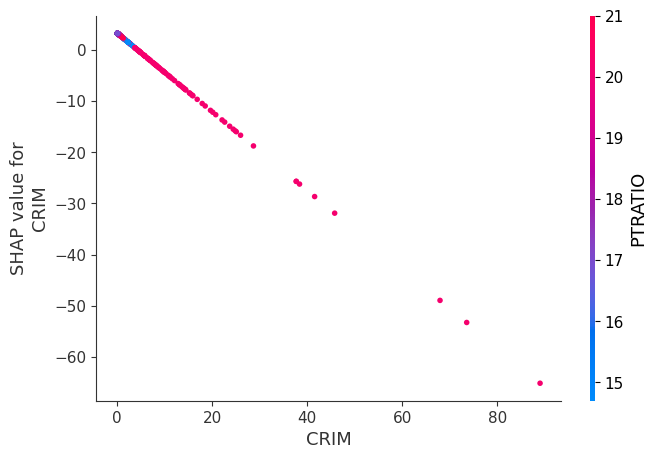

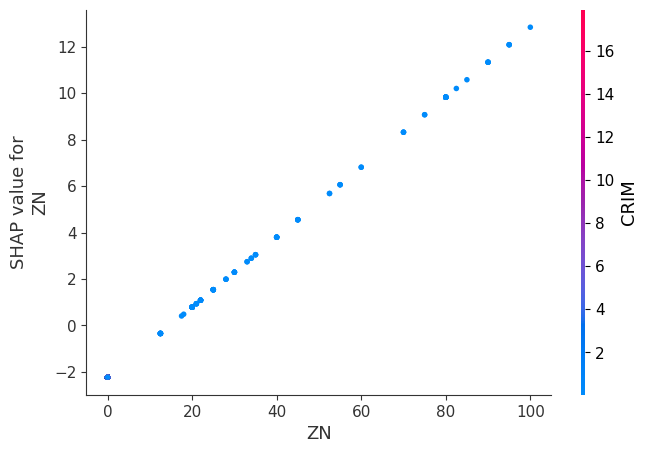

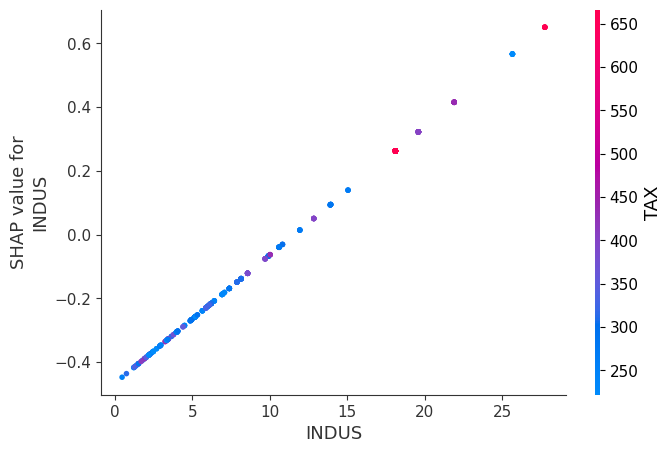

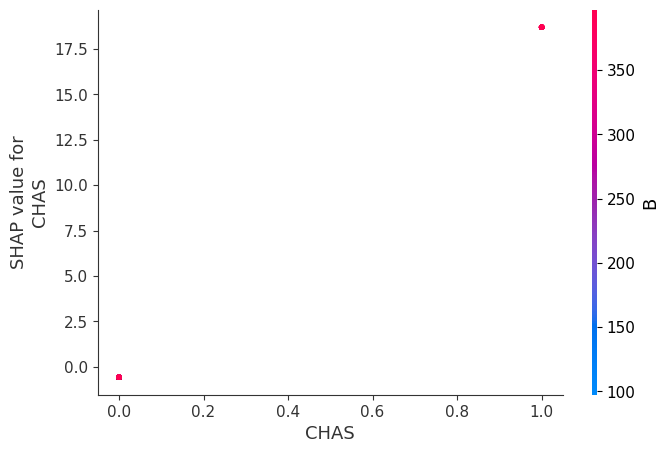

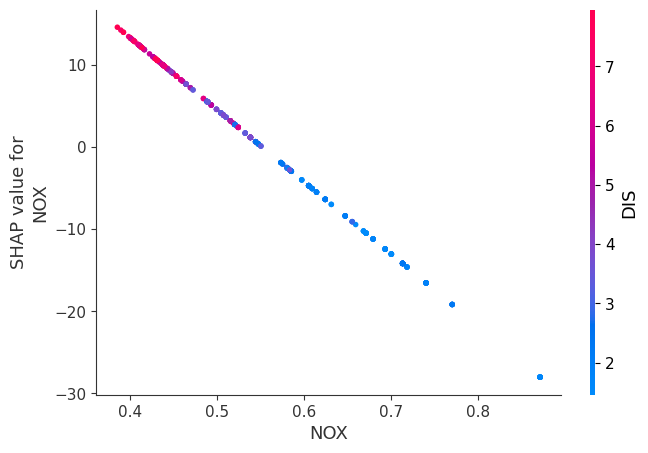

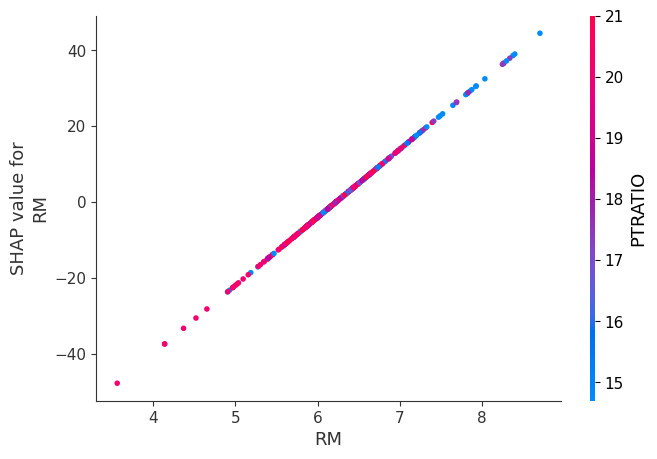

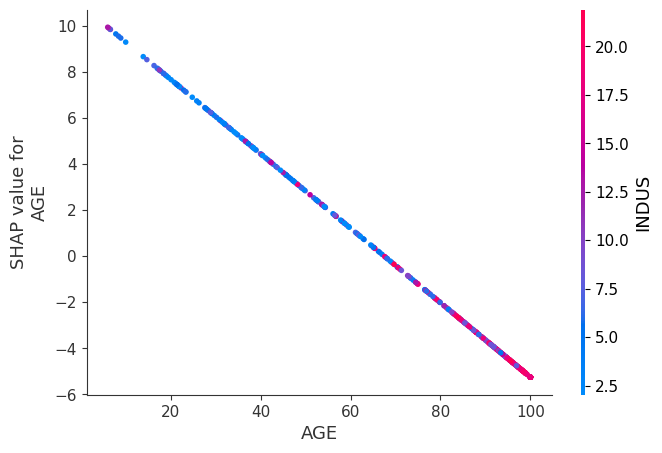

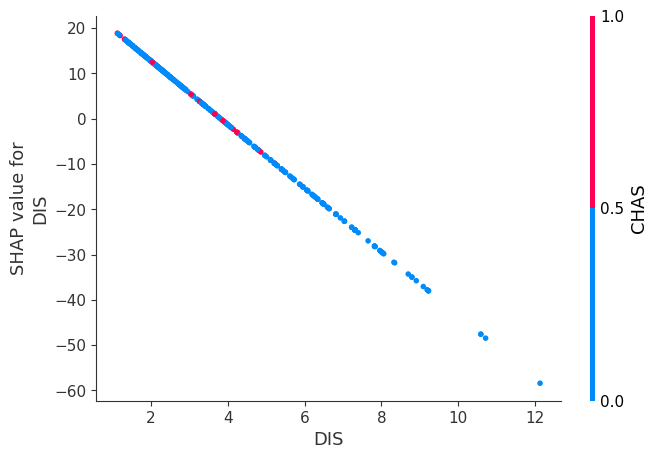

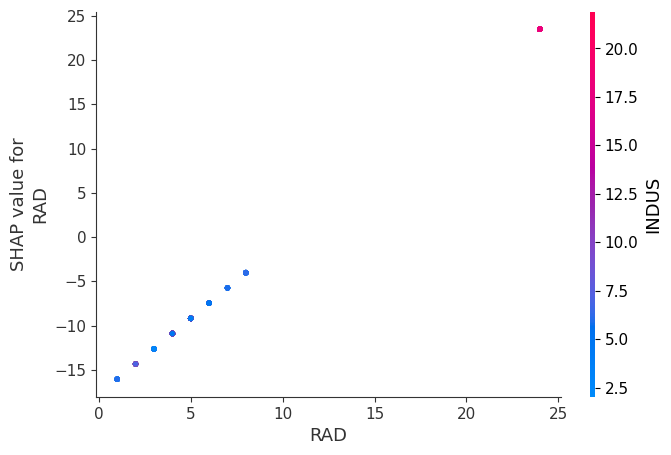

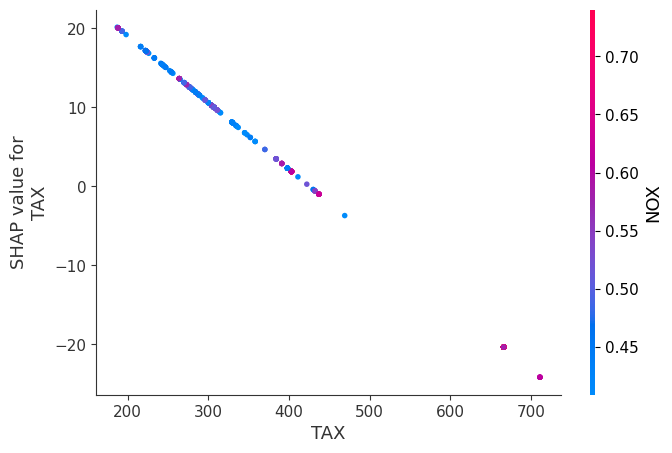

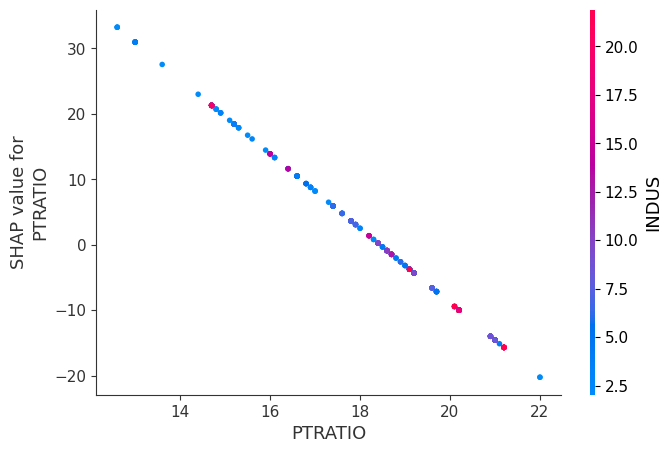

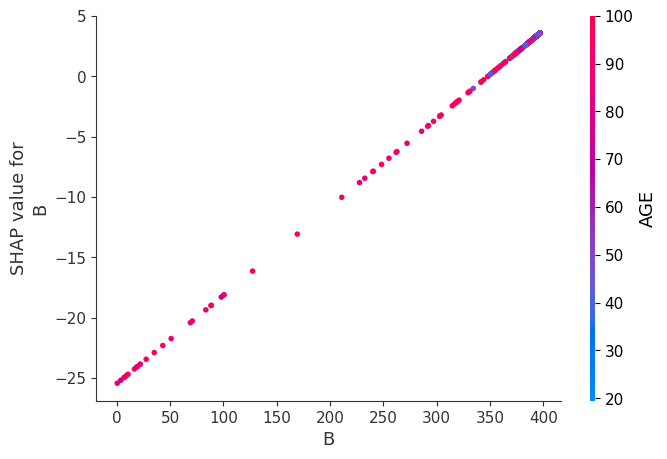

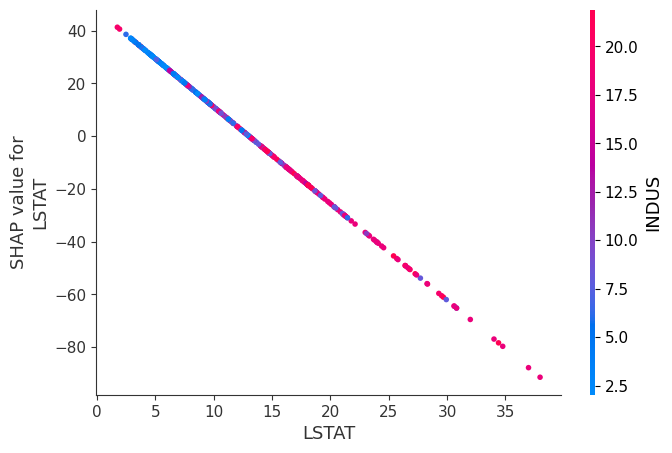

In [65]:
# SHAP partial dependence plot for linear model
for i in X_train.columns:
    shap.dependence_plot(i, shap_values.values, X_train)

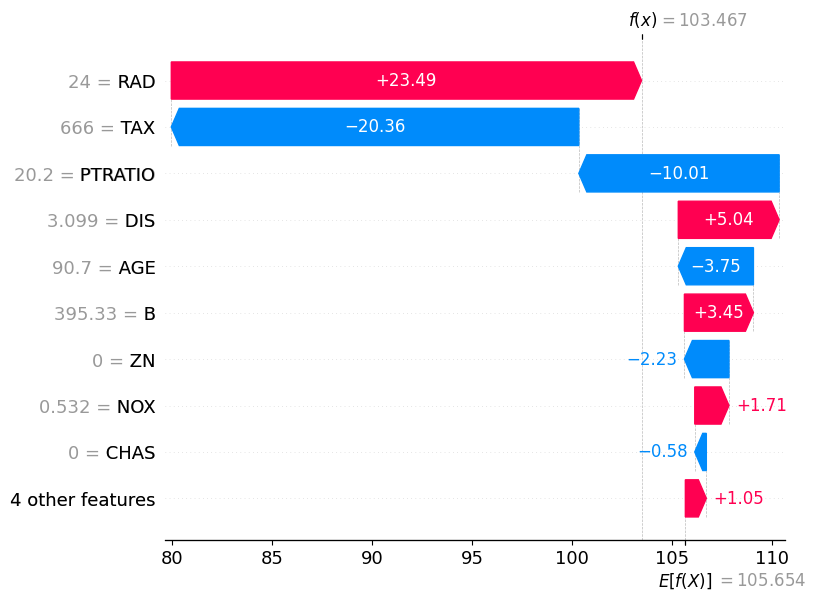

In [66]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

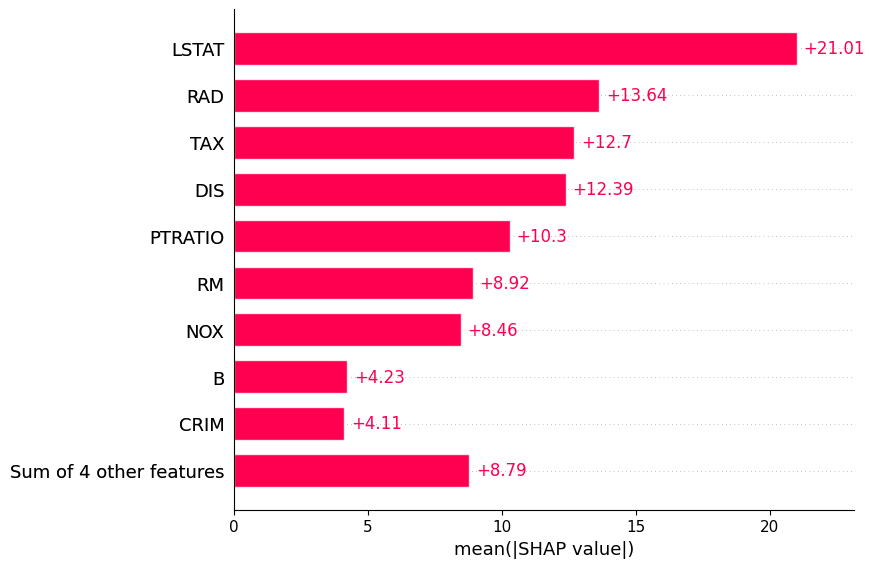

In [67]:
shap.plots.bar(shap_values)

The shap.plots.bar() method is used to create a bar plot of the SHAP values for all features in a dataset.

The shap_values variable contains the SHAP values for each feature in the dataset, where each row represents an instance in the data, and each column represents a feature. The shap.plots.bar() method takes in the SHAP values as input and generates a bar plot showing the mean absolute SHAP value for each feature across all instances in the dataset.

The bar plot can be useful in identifying which features have the most significant impact on the model's predictions. Features with a larger absolute mean SHAP value are more important in explaining the model's behavior for the dataset, as they contribute more to the model's predictions.

LSTAT has the highest value among all the features

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


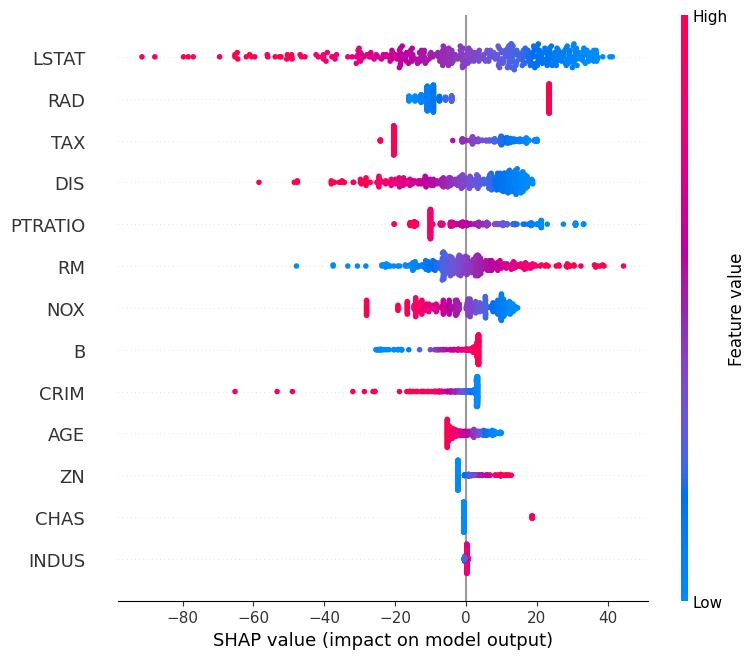

In [68]:
# SHAP summary for Linear Model
shap.summary_plot(shap_values, X_train)

[0.12186519 0.02417166 0.04447298 0.01204208 0.07262989 0.13203727
 0.11979664 0.11142536 0.03682249 0.04198713 0.04344126 0.10909807
 0.13020997]


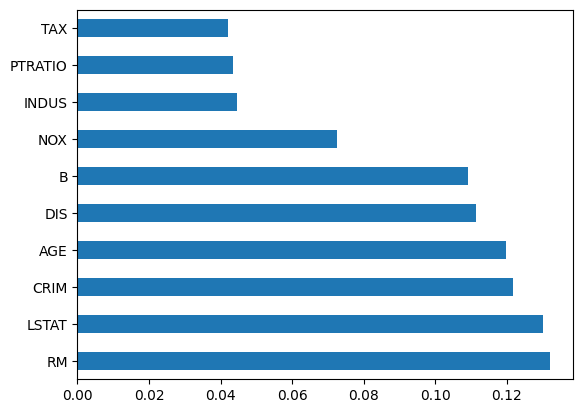

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
extra_model = ExtraTreesClassifier()
extra_model.fit(X_train,y_train)
print(extra_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(extra_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From the above observation, RM has the highest value among the features.

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
tree_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=10)
tree_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0)

In [71]:
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier, export_graphviz

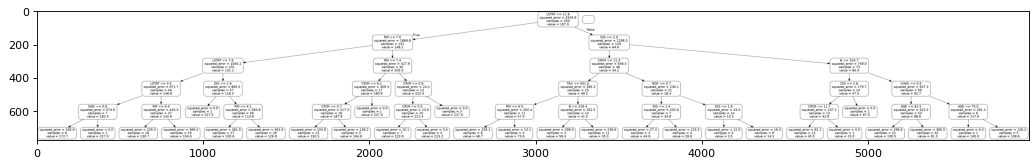

In [72]:
#Visualization of Nodes

figure(figsize=(16, 12), dpi=80)
tree= tree_model.estimators_[0]
export_graphviz(
tree,
out_file="tree.dot",
feature_names=list (X_train.columns),
rounded=True,
precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img=mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

A higher leaf value indicates that instances assigned to that leaf node tend to have higher values of the target variable. This might suggest that the feature(s) used to split the tree leading to that leaf node are strongly correlated with the target variable.
A lower leaf value indicates that instances assigned to that leaf node tend to have lower values of the target variable. This might suggest that the feature(s) used to split the tree leading to that leaf node are weakly correlated with the target variable, or that there is some noise or variability in the data.

In [73]:
explain = shap.TreeExplainer(tree)
tree_shap_values = explain.shap_values(X_train)

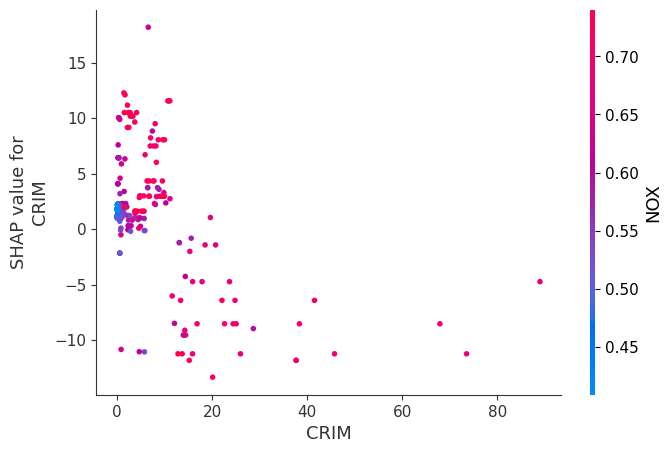

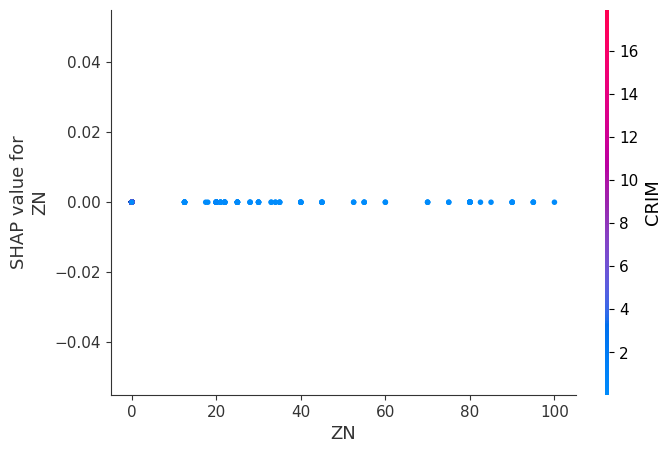

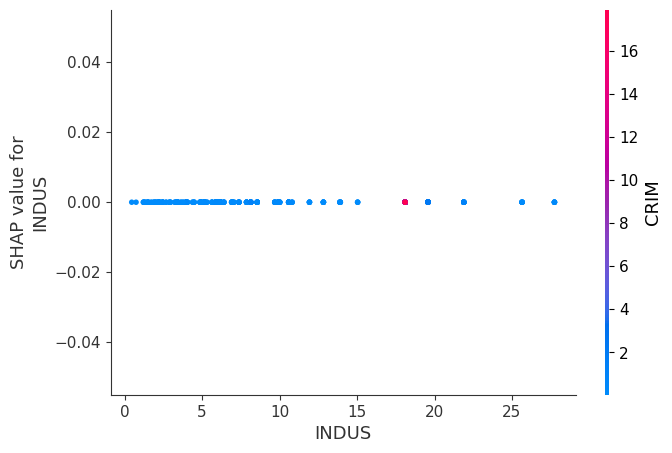

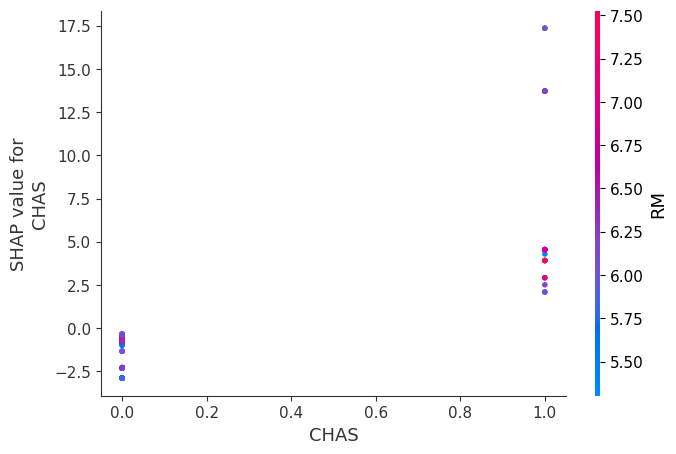

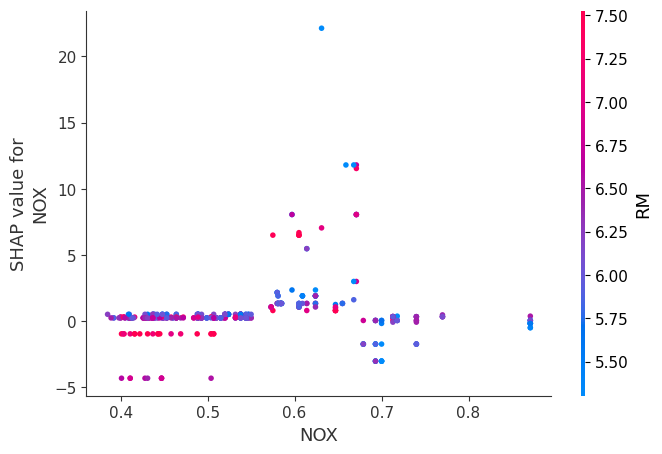

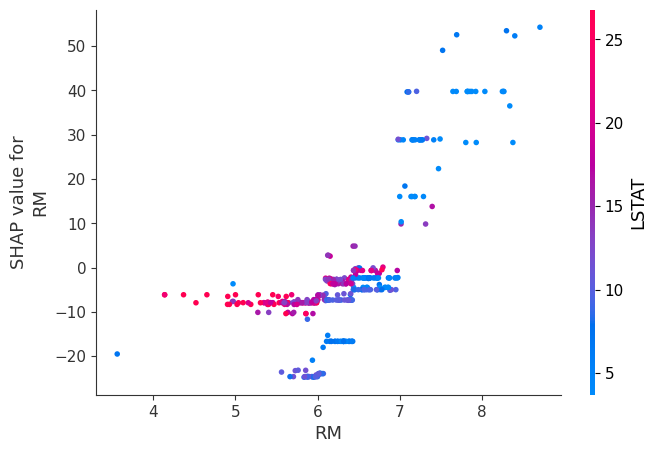

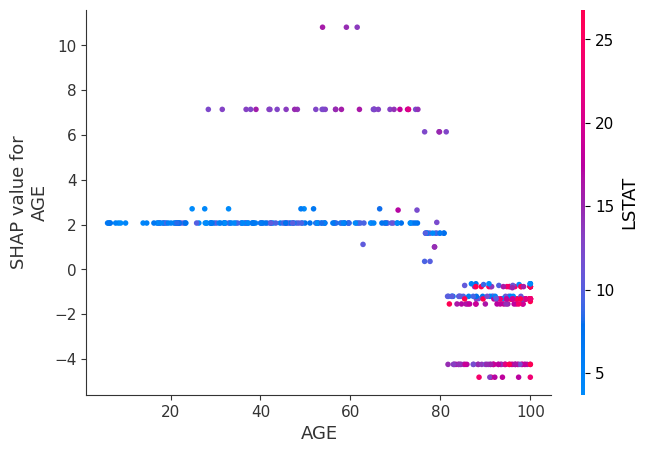

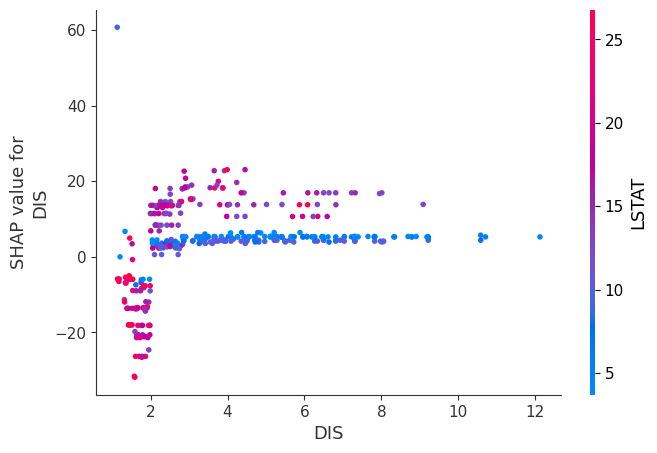

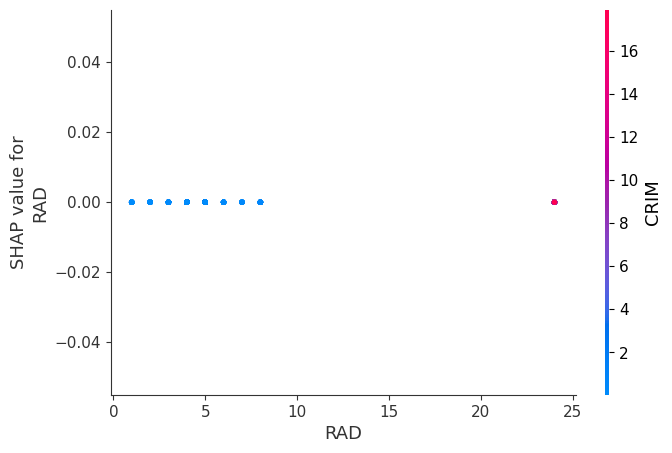

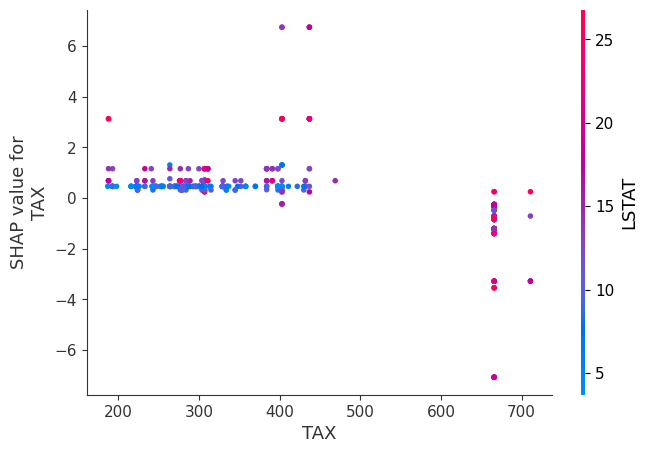

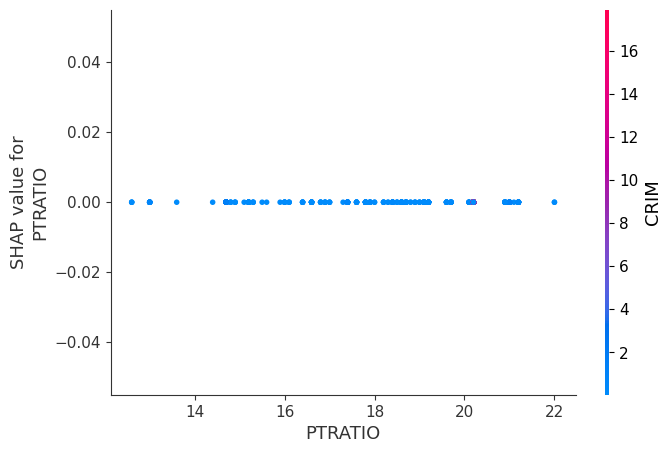

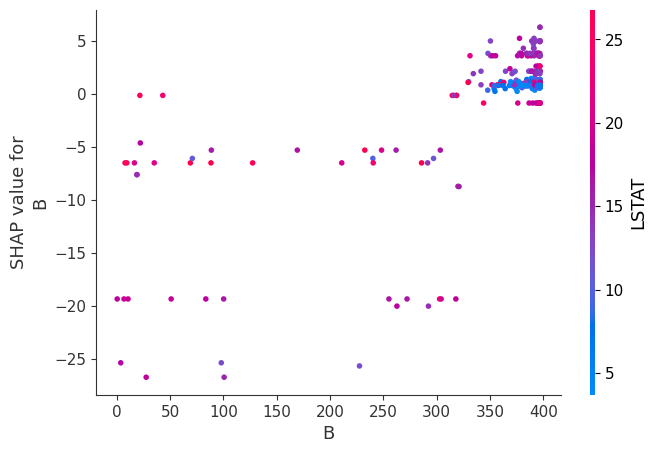

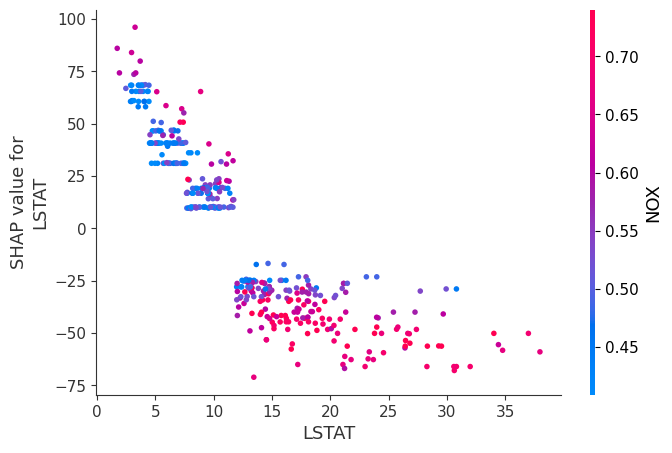

In [74]:
# SHAP partial dependence plot for a tree based model
for i in X_train.columns:
    shap.dependence_plot(i, tree_shap_values, X_train)

In [75]:
dk = h2o.import_file('https://raw.githubusercontent.com/Niharika-Santhoshini-Karri/Datasets/main/Housing.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [76]:
aml = H2OAutoML(max_models =25,balance_classes=True,seed =1)
train, test = dk.split_frame(ratios=[0.8], seed = 1)

In [77]:
aml.train(training_frame = train, y = 'MEDV')

AutoML progress: |██████████████
01:37:02.597: DeepLearning_1_AutoML_3_20231003_13635 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_3_20231003_13635_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


█████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_3_20231003_13635


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  18/40
# GBM base models (used / total)      1/9
# XGBoost base models (used / total)  16/28
# DRF base models (used / total)      0/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.35729619766860965
RMSE: 0.5977425847876405
MAE: 0.3941592638488525
RMSLE: 0.029527656751741946
Mean Residual Deviance: 0.35729619766860965
R^2: 0.9956797724725222
Null degrees of freedom: 398
Residual degrees of freedom: 380
Null deviance: 32998.53583244134
Residual deviance: 142.56118286977525
AIC: 761.6660773112322

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 9.918288067075833
RMSE: 3.1493313682551465
MAE: 2.0749925876678423
RMSLE: 0.14646634536476932
Mean Residual Deviance: 9.918288067075833
R^2: 0.8800735596616169
Null degrees of freedom: 398
Residual degrees of freedom: 385
Null deviance: 33039.52612781212
Residual deviance: 3957.396938763258
AIC: 2077.770702173092

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     2.04213   0.424834   1.9051        2.2108        1.63093       1.7663        2.69752
mean_residual_deviance  9.80821   6.99142    8.33688       9.53077       4.36676       5.10215       21.7045
mse                     9.80821   6.99142    8.33688       9.53077       4.36676       5.10215       21.7045
null_deviance           6607.91   1320.92    6695.44       8299.19       6982.18       4622.19       6440.53
r2                      0.877965  0.0909659  0.900357      0.897696      0.95386       0.917657      0.720253
residual_deviance       802.599   598.536    666.951       848.239       318.774       377.559       1801.47
rmse                    2.99637   1.01857    2.88737       3.08719       2.08968       2.25879       4.65881
rmsle                   0.143677  0.0255809  0.152476      0.155022      0.120383      0.114726      0.175781

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.


these metrics show that the model has a relatively low error (MSE, RMSE, MAE), a good fit to the data (R^2), and a low AIC. However, more information is needed about the specific problem and data set to determine if the model is truly useful.
MSE (Mean Squared Error) is the average of the squared differences between the predicted and actual values. The lower the value, the better the model performance.
RMSE (Root Mean Squared Error) is the square root of the MSE. It measures the average distance between the predicted and actual values, in the same units as the target variable. The lower the value, the better the model performance.
MAE (Mean Absolute Error) is the average of the absolute differences between the predicted and actual values. It measures the average magnitude of errors in the predictions, in the same units as the target variable. The lower the value, the better the model performance.
RMSLE (Root Mean Squared Logarithmic Error) is the square root of the average of the squared differences between the logarithm of predicted and actual values. It is commonly used when the target variable has a wide range of values. The lower the value, the better the model performance.
Mean Residual Deviance is the mean of the squared differences between the predicted and actual values. It is used in generalized linear models, which allow the target variable to have a non-normal distribution.
R^2 (R-squared) is a statistical measure of how well the regression line approximates the real data points. It ranges from 0 to 1, with higher values indicating a better fit. An R-squared value of 0.88 means that the model explains 88% of the variance in the target variable.
Null degrees of freedom is the number of observations minus the number of parameters in the model.
Residual degrees of freedom is the number of observations minus the number of parameters and the number of non-zero coefficients in the model.
Null deviance is the deviance of a model with only an intercept as the predictor.
Residual deviance is the deviance of the fitted model, which measures how well the model fits the data.
AIC (Akaike Information Criterion) is a measure of the model's quality, adjusted for the number of parameters. The lower the AIC, the better the model performance.


In [78]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                   rmse       mse      mae       rmsle    mean_residual_deviance
------------------------------------------------------  -------  --------  -------  ----------  ------------------------
StackedEnsemble_AllModels_1_AutoML_3_20231003_13635     3.14933   9.91829  2.07499    0.146466                   9.91829
StackedEnsemble_BestOfFamily_1_AutoML_3_20231003_13635  3.23093  10.4389   2.16537    0.145503                  10.4389
XGBoost_grid_1_AutoML_3_20231003_13635_model_2          3.30558  10.9269   2.32289    0.154561                  10.9269
XGBoost_grid_1_AutoML_3_20231003_13635_model_3          3.3256   11.0596   2.19012    0.158302                  11.0596
XGBoost_grid_1_AutoML_3_20231003_13635_model_13         3.32563  11.0598   2.3226     0.158935                  11.0598
XGBoost_grid_1_AutoML_3_20231003_13635_model_24         3.3299   11.0882   2.2487     0.154759                  11.0882
GBM_5_AutoML_3_20231003_13635                           3.33711  11.1363   2.19866    0.151728                  11.1363
XGBoost_grid_1_AutoML_3_20231003_13635_model_1          3.34039  11.1582   2.27063    0.163099                  11.1582
GBM_grid_1_AutoML_3_20231003_13635_model_2              3.34595  11.1954   2.17221    0.15915                   11.1954
XGBoost_2_AutoML_3_20231003_13635                       3.40739  11.6103   2.30767    0.159409                  11.6103
XRT_1_AutoML_3_20231003_13635                           3.43128  11.7737   2.25905    0.152215                  11.7737
XGBoost_grid_1_AutoML_3_20231003_13635_model_22         3.44513  11.869    2.2473     0.155998                  11.869
GBM_2_AutoML_3_20231003_13635                           3.45885  11.9637   2.237      0.156201                  11.9637
XGBoost_grid_1_AutoML_3_20231003_13635_model_31         3.45952  11.9683   2.35537    0.156493                  11.9683
XGBoost_grid_1_AutoML_3_20231003_13635_model_30         3.46726  12.0219   2.3439     0.153778                  12.0219
DRF_1_AutoML_3_20231003_13635                           3.47506  12.076    2.25565    0.153666                  12.076
XGBoost_grid_1_AutoML_3_20231003_13635_model_18         3.48992  12.1796   2.2517     0.168712                  12.1796
GBM_3_AutoML_3_20231003_13635                           3.49049  12.1835   2.21926    0.155161                  12.1835
GBM_4_AutoML_3_20231003_13635                           3.49699  12.229    2.23061    0.155445                  12.229
XGBoost_grid_1_AutoML_3_20231003_13635_model_20         3.49868  12.2407   2.39561    0.165711                  12.2407
XGBoost_grid_1_AutoML_3_20231003_13635_model_19         3.52331  12.4137   2.32854    0.159646                  12.4137
XGBoost_3_AutoML_3_20231003_13635                       3.52838  12.4495   2.28515    0.165774                  12.4495
XGBoost_grid_1_AutoML_3_20231003_13635_model_23         3.55978  12.672    2.41995    0.171689                  12.672
XGBoost_grid_1_AutoML_3_20231003_13635_model_29         3.56935  12.7403   2.44385    0.167059                  12.7403
GBM_grid_1_AutoML_3_20231003_13635_model_3              3.5896   12.8853   2.31358    0.162148                  12.8853
XGBoost_grid_1_AutoML_3_20231003_13635_model_4          3.60491  12.9954   2.3546     0.161431                  12.9954
XGBoost_grid_1_AutoML_3_20231003_13635_model_15         3.60862  13.0221   2.44591    0.161199                  13.0221
XGBoost_grid_1_AutoML_3_20231003_13635_model_28         3.61181  13.0452   2.31317    0.166469                  13.0452
XGBoost_1_AutoML_3_20231003_13635                       3.62111  13.1124   2.4532     0.175572                  13.1124
XGBoost_grid_1_AutoML_3_20231003_13635_model_5          3.63703  13.228    2.56334    0.169868                  13.228
XGBoost_grid_1_AutoML_3_20231003_13635_model_14         3.65399  13.3517   2.34195    0.16314                   13.3517
GBM_grid_1_AutoML_3_20231003_13635_model_1

Based on the results, the Stacked Ensemble model with all the models included achieved the best performance in terms of RMSE (3.14933) and MSE (9.91829). The Stacked Ensemble model with the best model family also performed well with an RMSE of 3.23093 and MSE of 10.4389.

XGBoost models and GBM models also performed well with RMSE values ranging from 3.30558 to 3.52838. DRF model had an RMSE value of 3.47506, which is also a decent performance.

The performance metrics show that all the models have relatively similar values for the mean absolute error (MAE) and root mean squared logarithmic error (RMSLE) compared to the RMSE and MSE values.

It is worth noting that the difference between the best-performing model and the worst-performing model in terms of RMSE is relatively small (about 0.38), indicating that the models are all relatively close in performance.

In [79]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_3_20231003_13635


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  18/40
# GBM base models (used / total)      1/9
# XGBoost base models (used / total)  16/28
# DRF base models (used / total)      0/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.35729619766860965
RMSE: 0.5977425847876405
MAE: 0.3941592638488525
RMSLE: 0.029527656751741946
Mean Residual Deviance: 0.35729619766860965
R^2: 0.9956797724725222
Null degrees of freedom: 398
R

Each metric means:

mae: mean absolute error, which measures the average absolute difference between predicted and actual values. The mean MAE across all folds is 2.04213, with a standard deviation (sd) of 0.424834. Lower values are better.

mean_residual_deviance: the mean of the squared differences between predicted and actual values. The mean residual deviance across all folds is 9.80821, with a standard deviation of 6.99142. Lower values are better.

mse: mean squared error, which is similar to mean_residual_deviance but without taking the square root. This metric has the same values as mean_residual_deviance.

null_deviance: the deviance of a null model, which predicts the mean of the target variable for every instance. This metric helps to evaluate how much improvement the model provides over a simple baseline. The mean null deviance across all folds is 6607.91, with a standard deviation of 1320.92. Lower values are better.

r2: the coefficient of determination, which measures how well the model fits the data compared to a horizontal line (which would have an R2 of 0). The mean R2 across all folds is 0.877965, with a standard deviation of 0.0909659. Higher values are better.

residual_deviance: the sum of squared differences between predicted and actual values, minus the null deviance. This metric measures the improvement in model fit compared to the null model. The mean residual deviance across all folds is 802.599, with a standard deviation of 598.536. Lower values are better.

rmse: root mean squared error, which is the square root of mean_residual_deviance. The mean RMSE across all folds is 2.99637, with a standard deviation of 1.01857. Lower values are better.

rmsle: root mean squared logarithmic error, which is similar to RMSE but uses the logarithm of the predicted and actual values. This metric is useful when the target variable has a wide range of values. The mean RMSLE across all folds is 0.143677, with a standard deviation of 0.0255809. Lower values are better.

Overall, the model seems to perform reasonably well, with low values of MAE, RMSE, and RMSLE, and high values of R2. However, there is some variation in performance across folds, as indicated by the standard deviations of the metrics. It may be helpful to investigate further to understand why some folds perform better than others.

In [80]:
# Setting up AutoML
def autoML(df_train, df_test):
    X = df_train.columns
    y = "MEDV"

    X.remove(y)  # Removing the result frm our predictors data
    #X.remove("title")  # Removing ID from the predictor's data, as it is not related

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml

In [81]:
# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [82]:
autoML = autoML(train, test)  # Training AutoML

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [83]:
autoML_model = getBestModel(autoML[2])

2


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

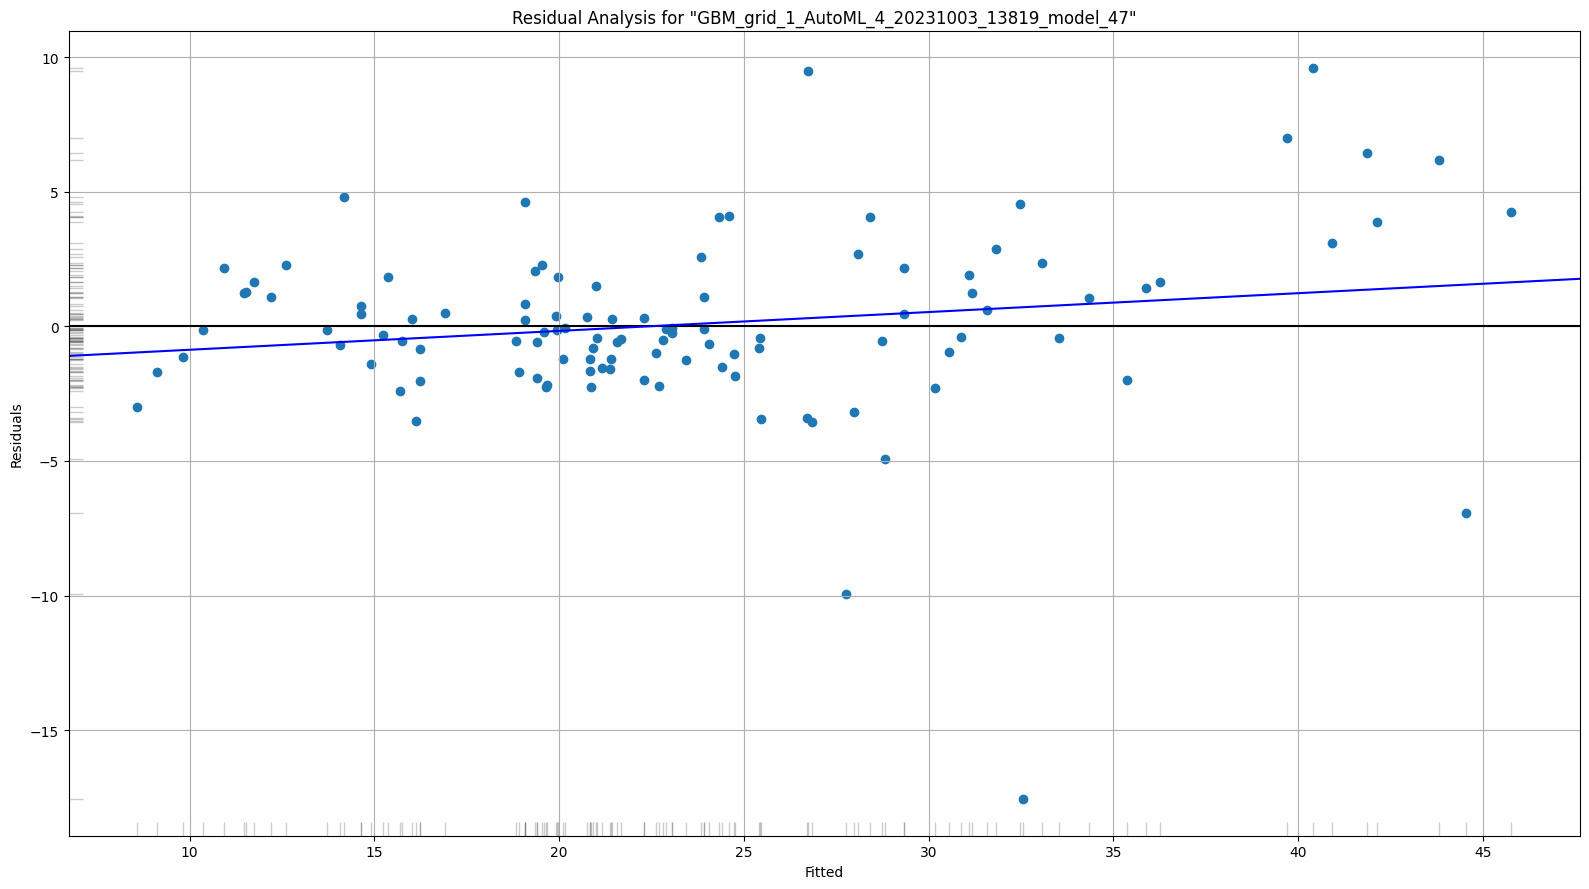

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

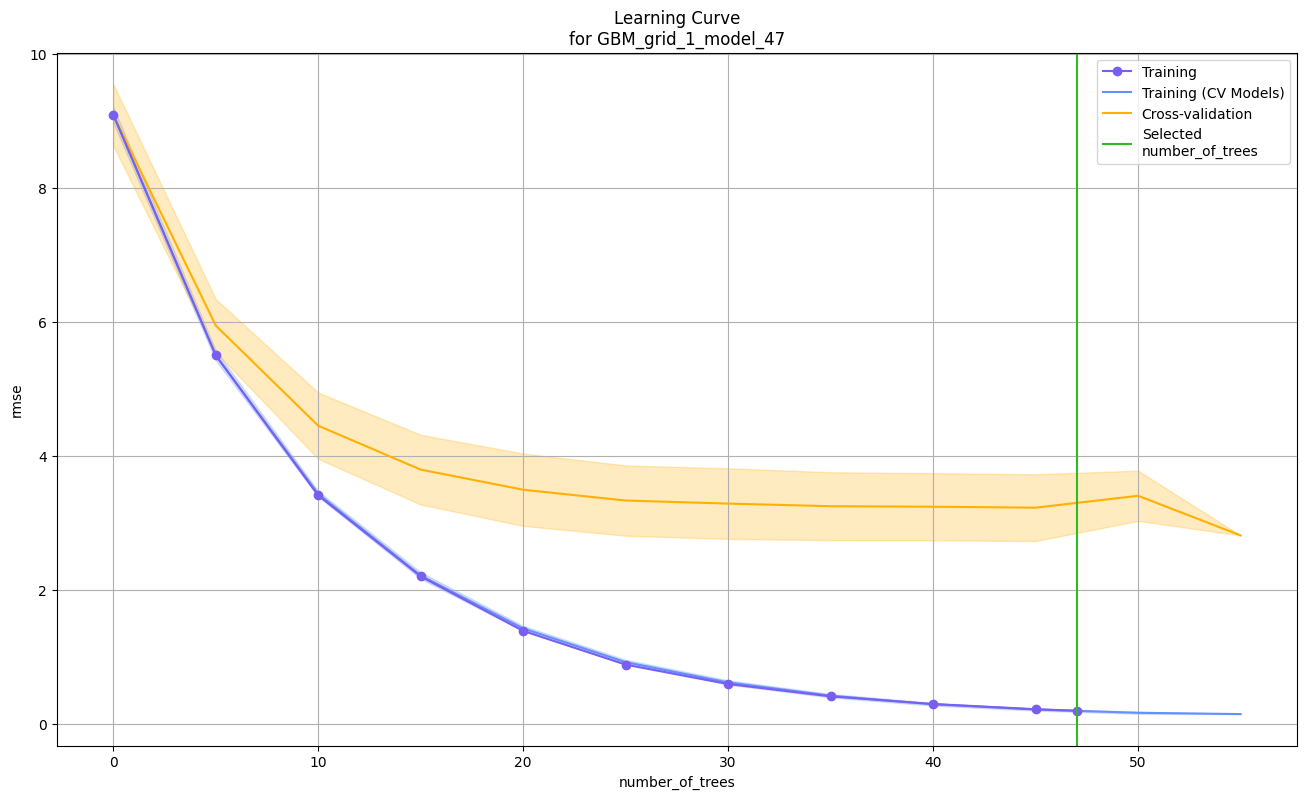

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

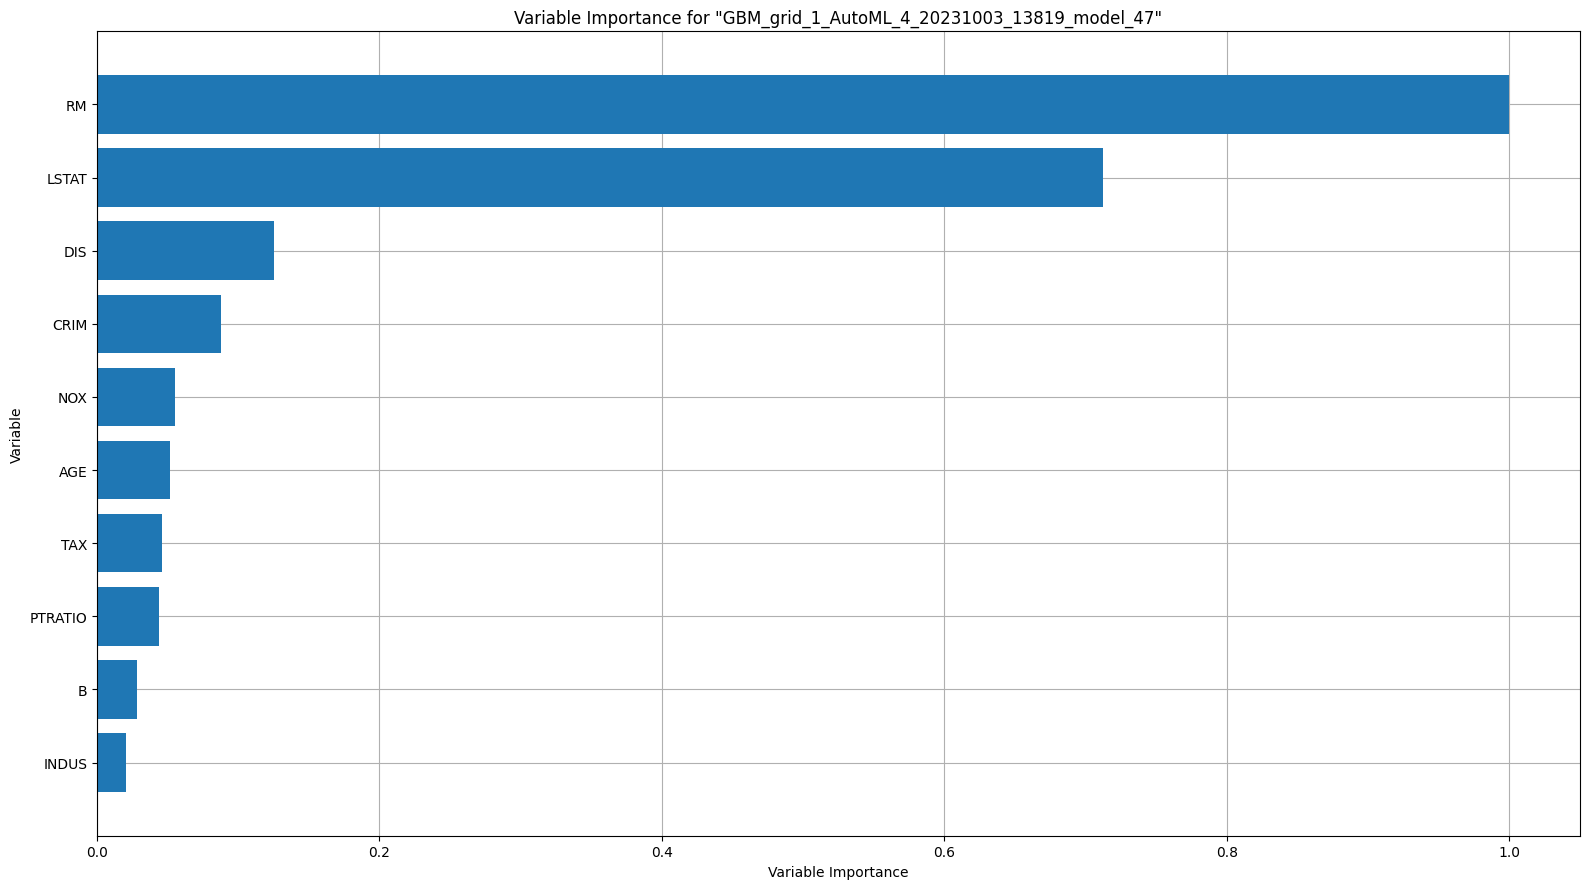

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

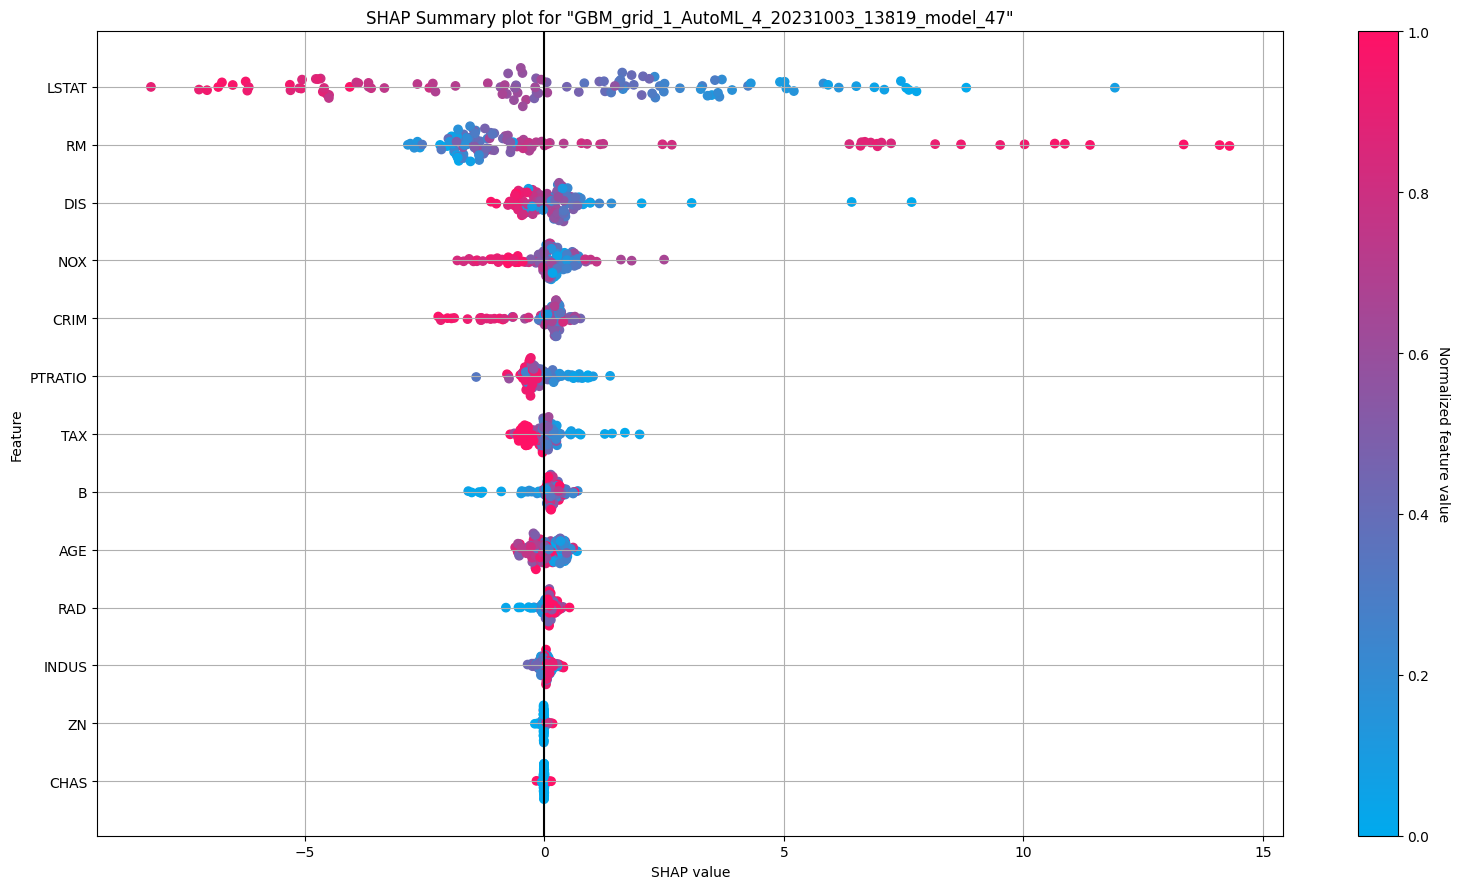

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

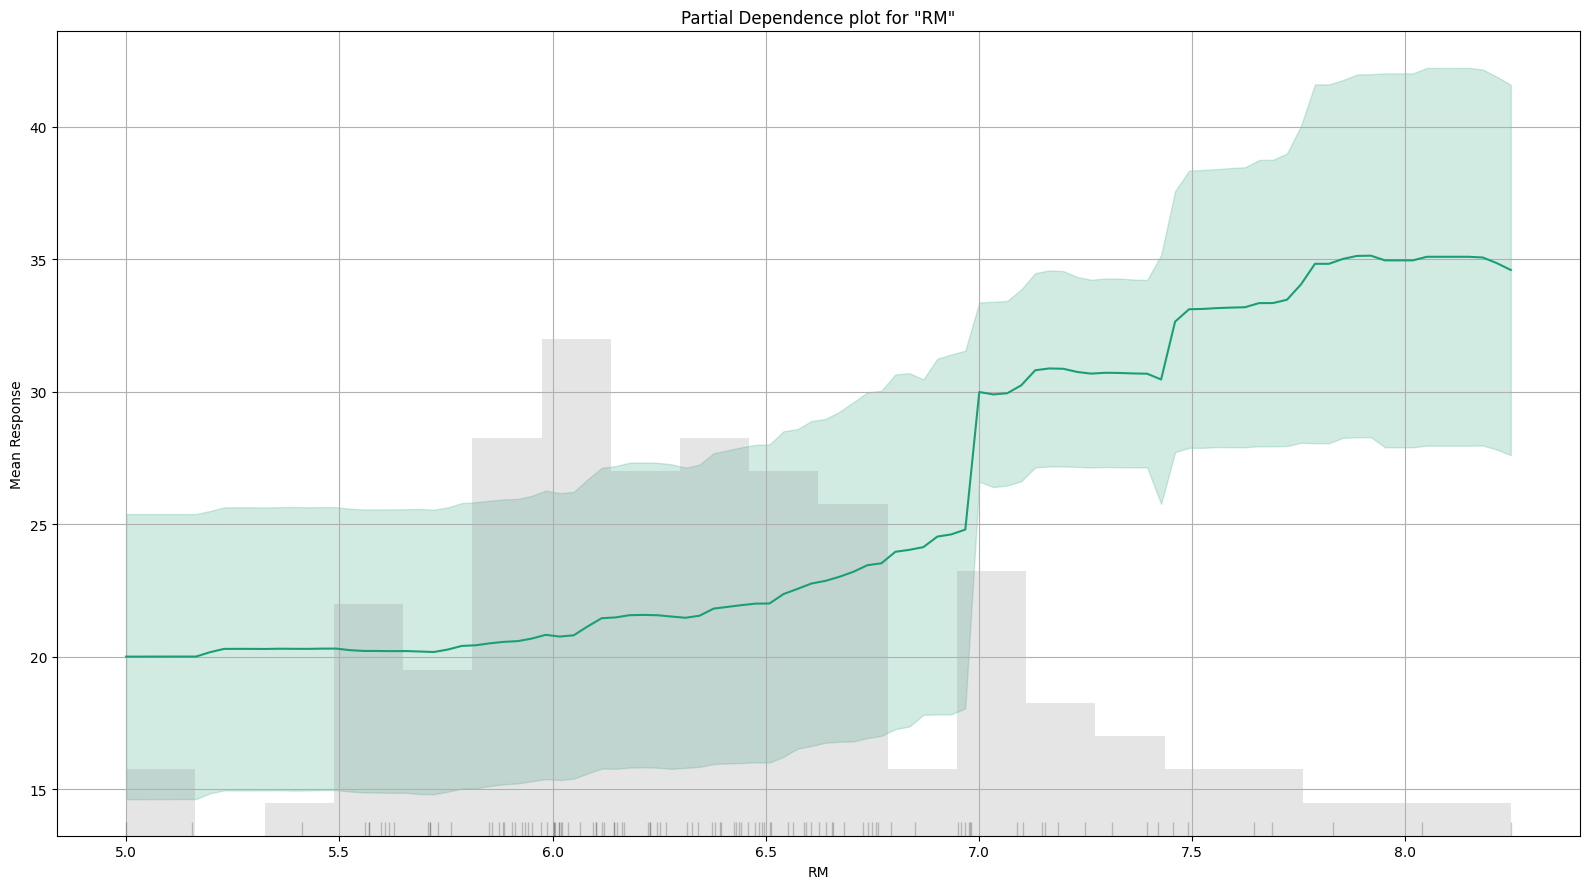

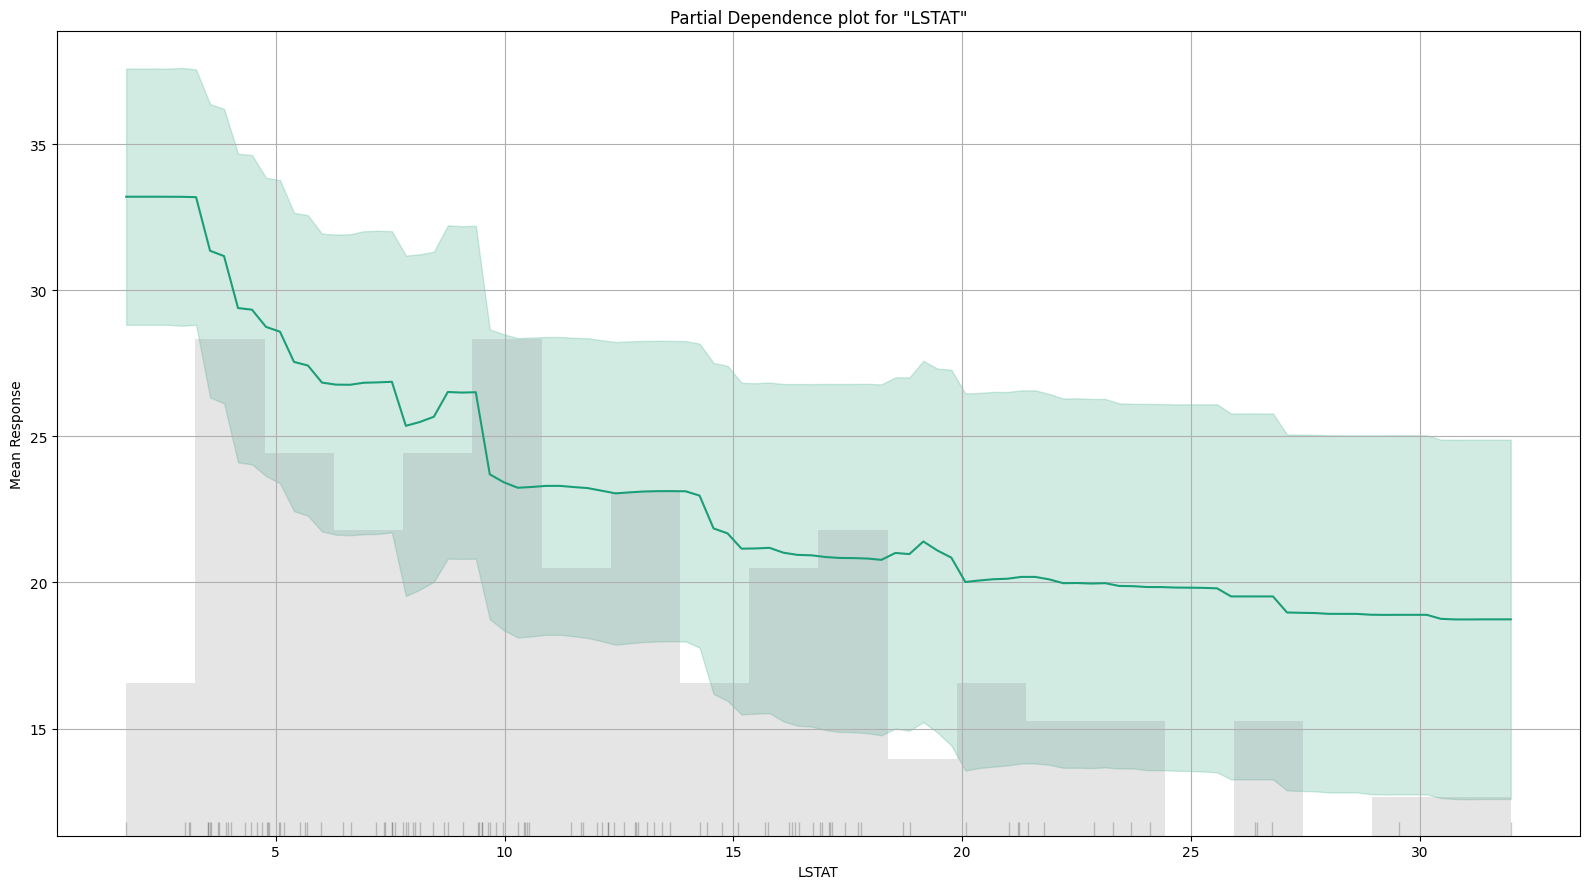

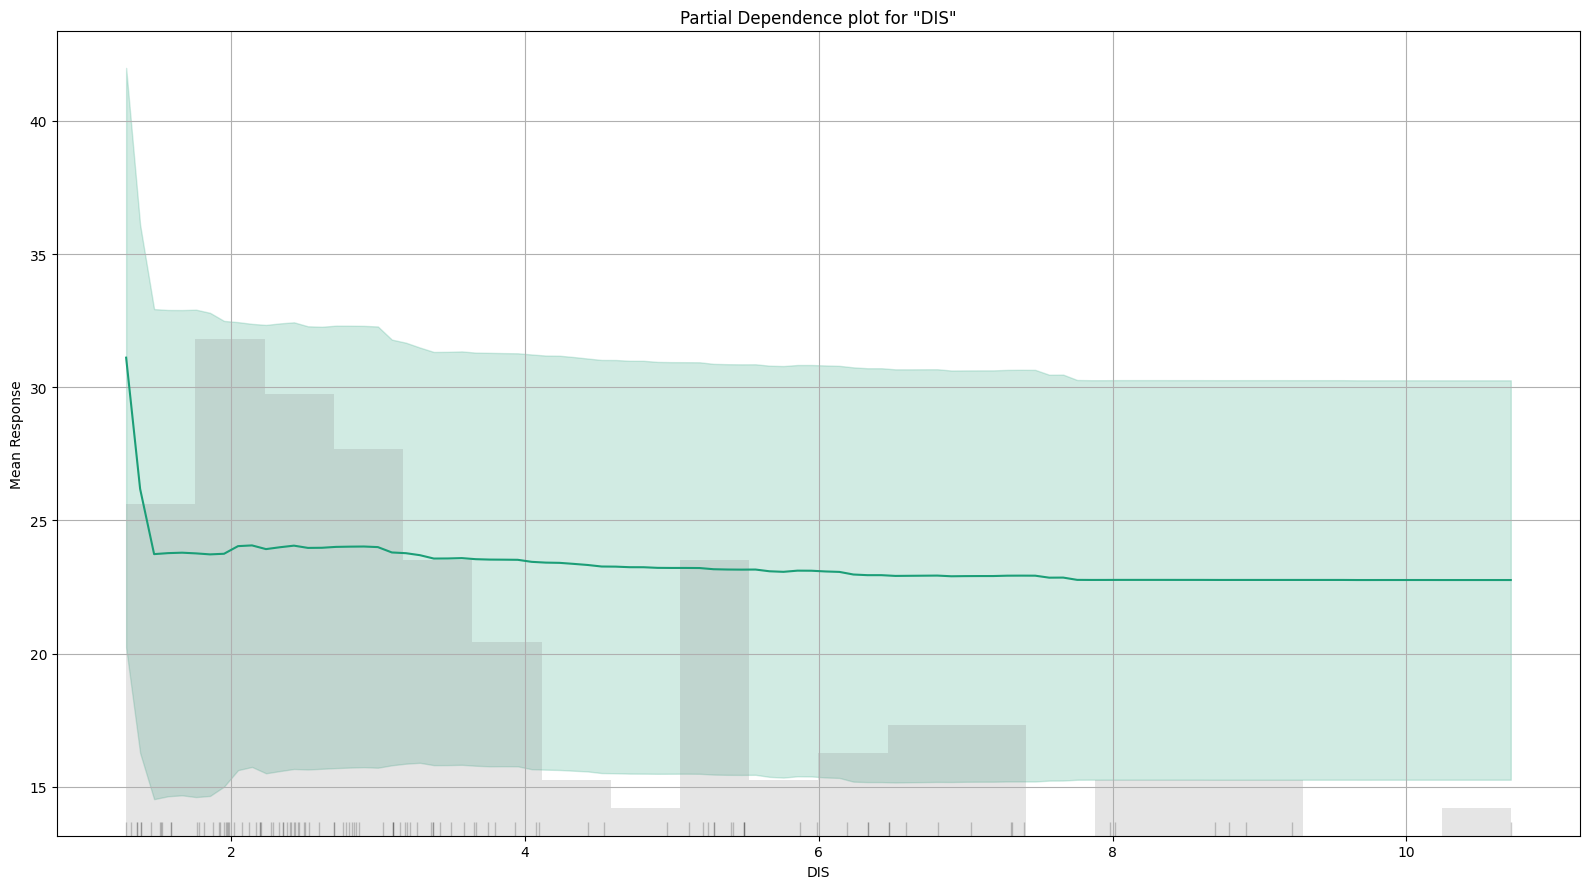

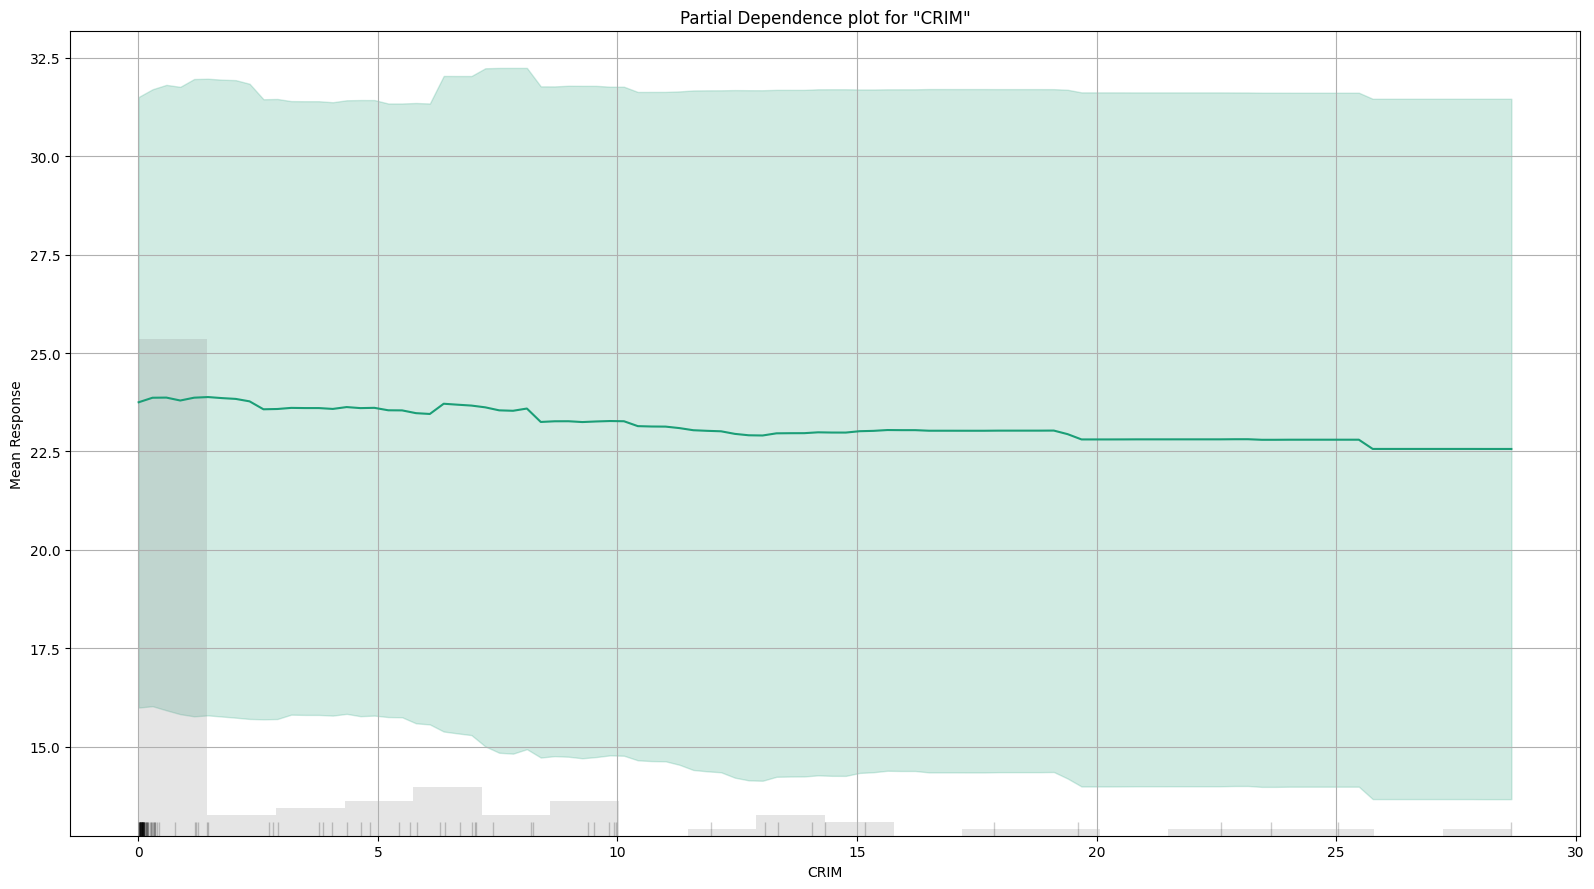

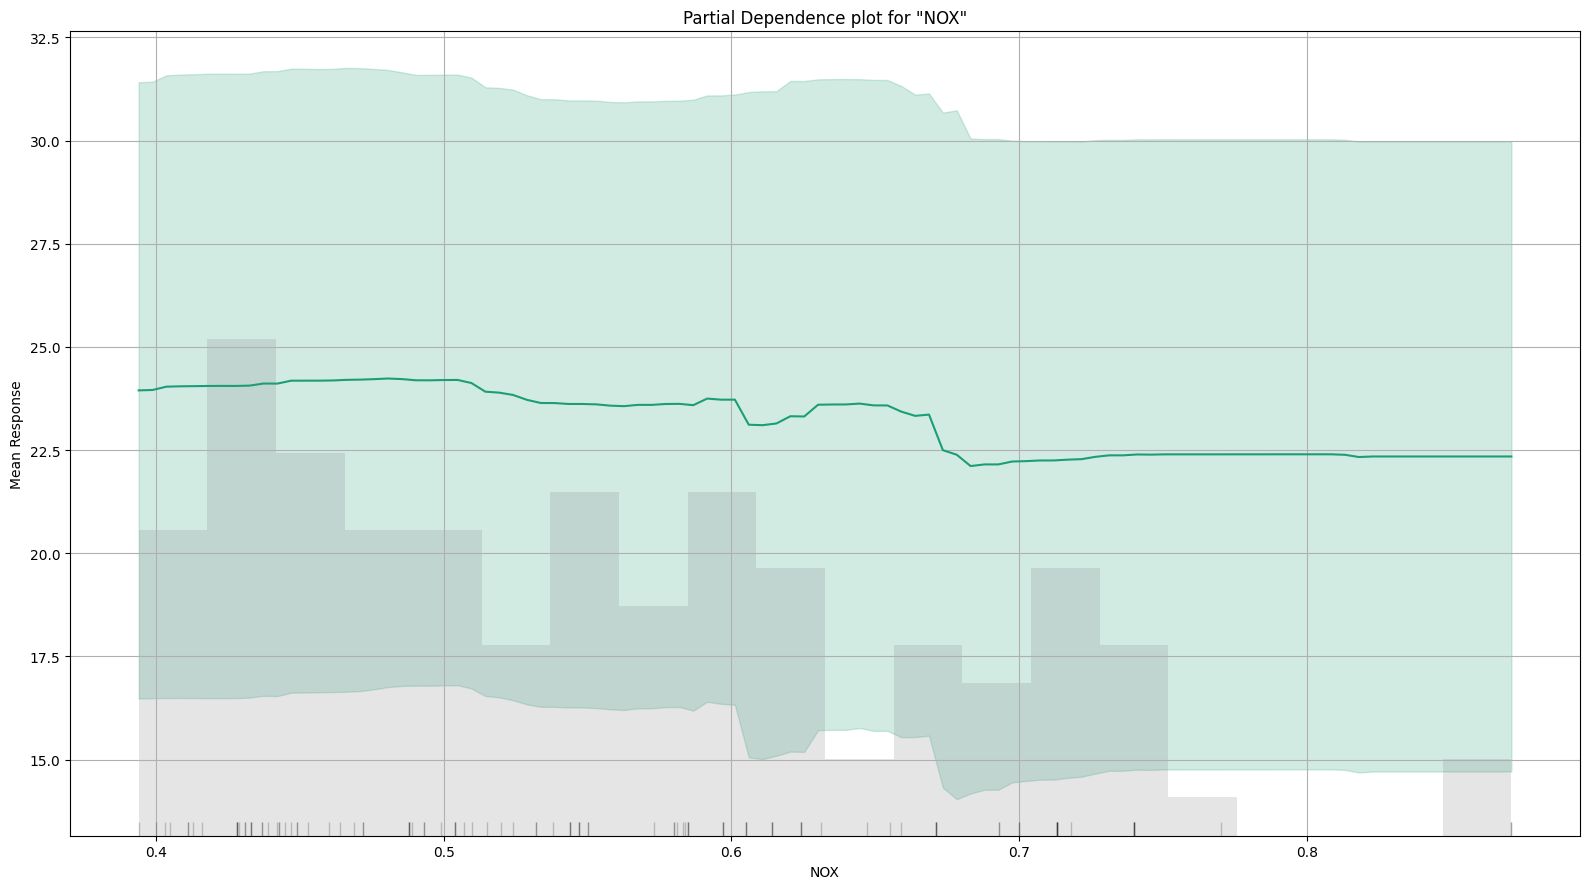

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

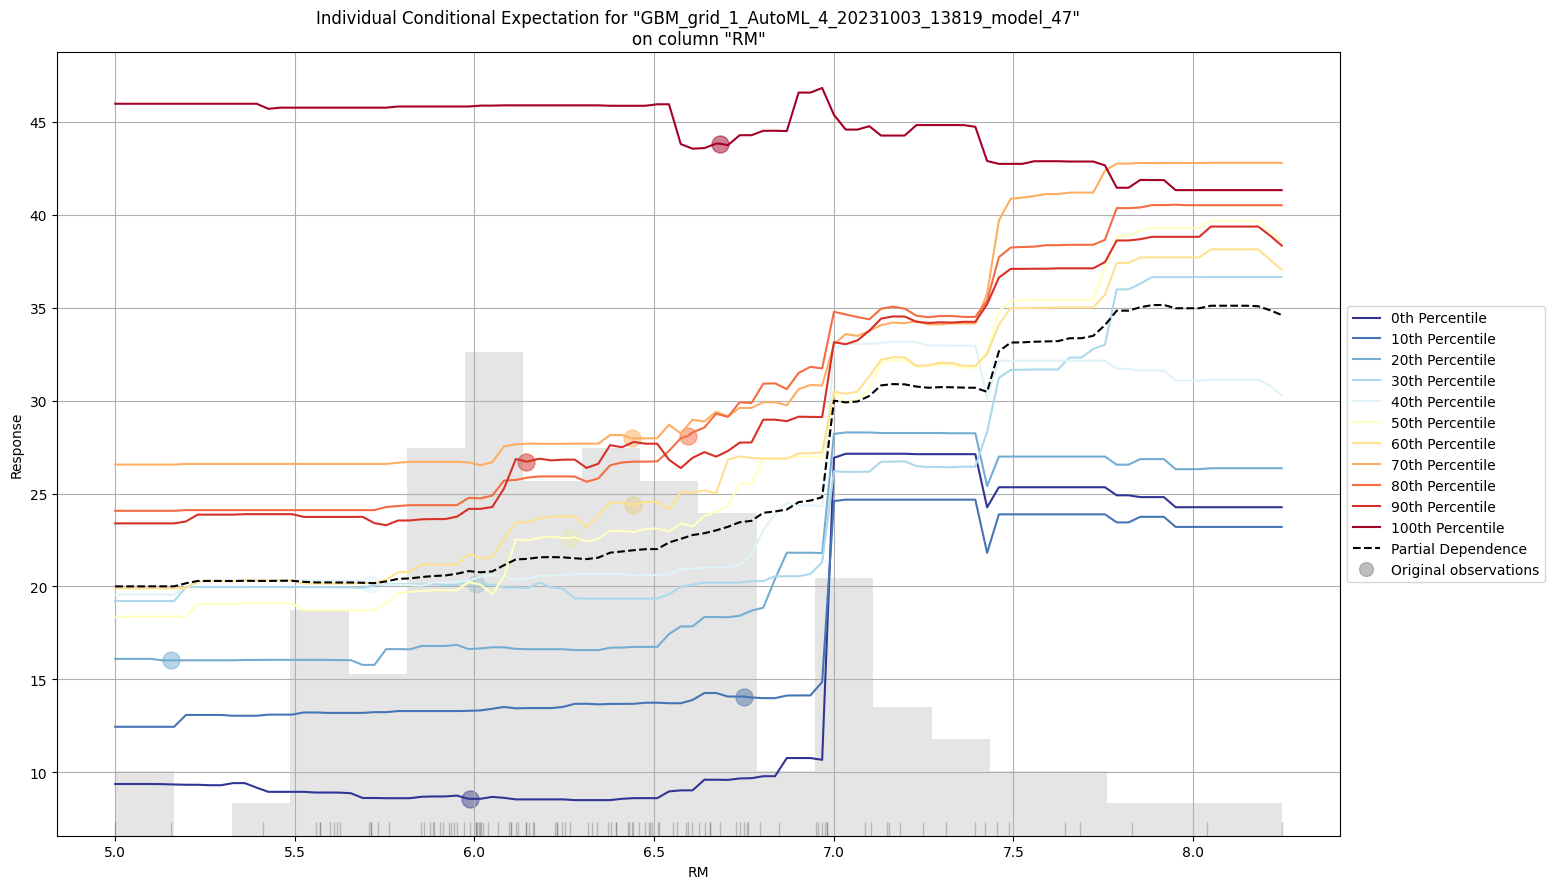

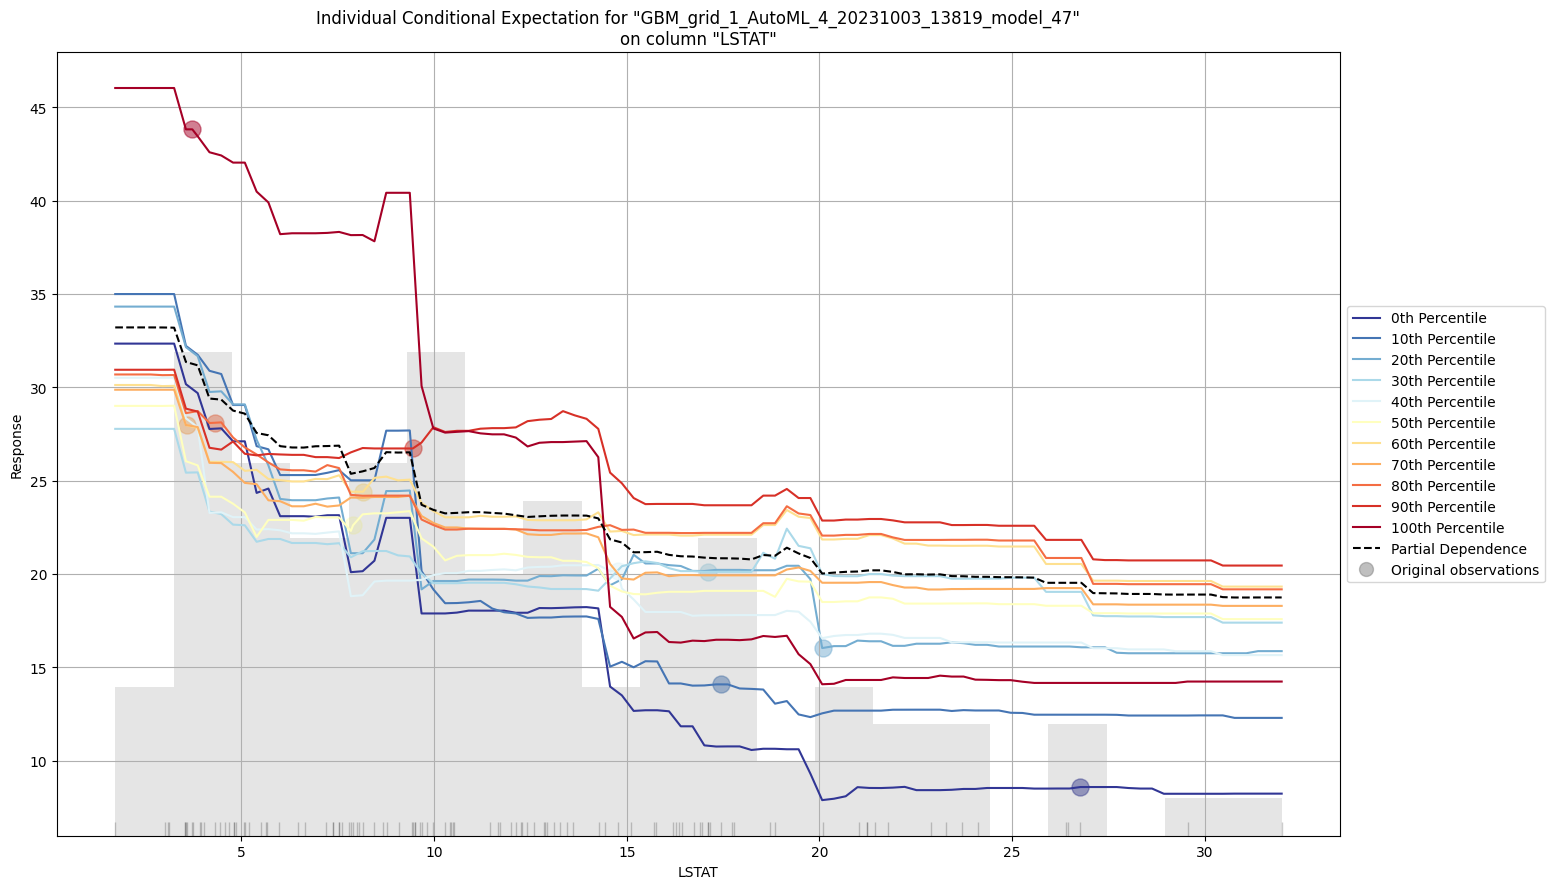

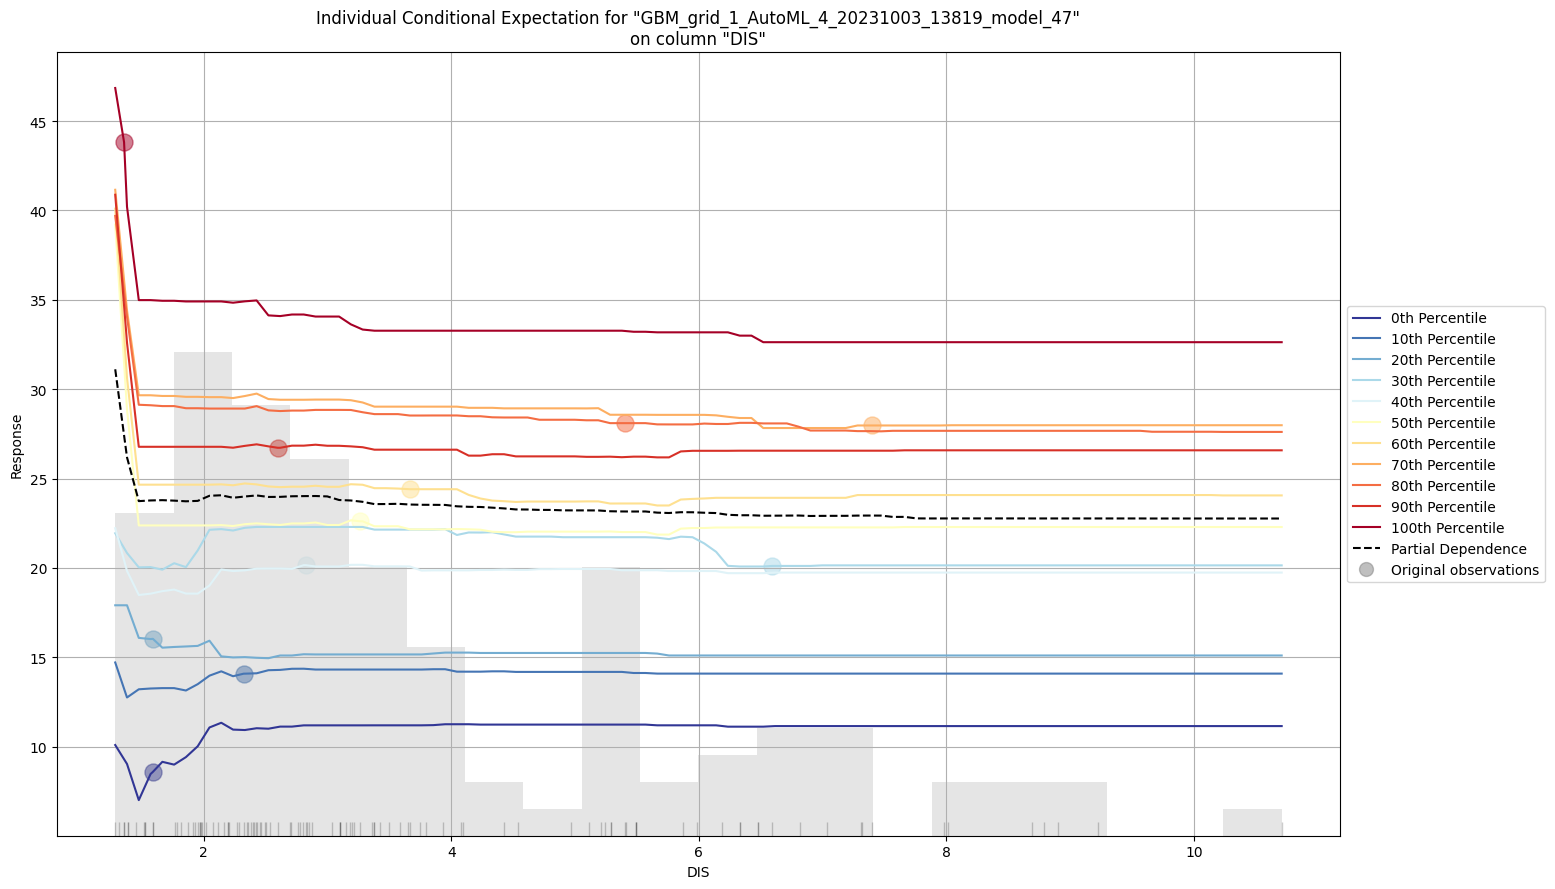

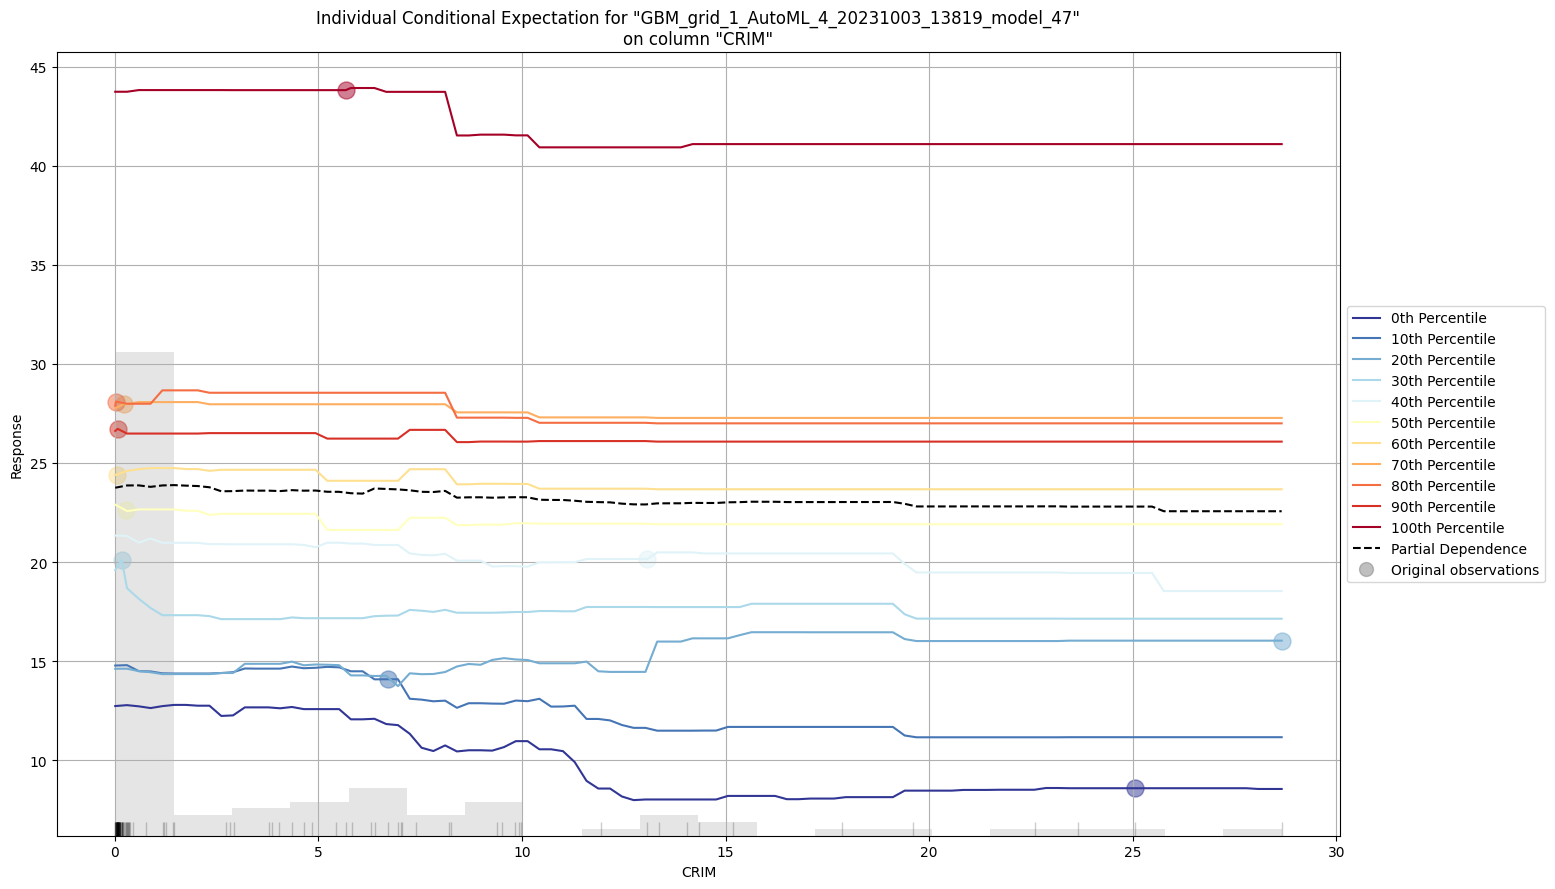

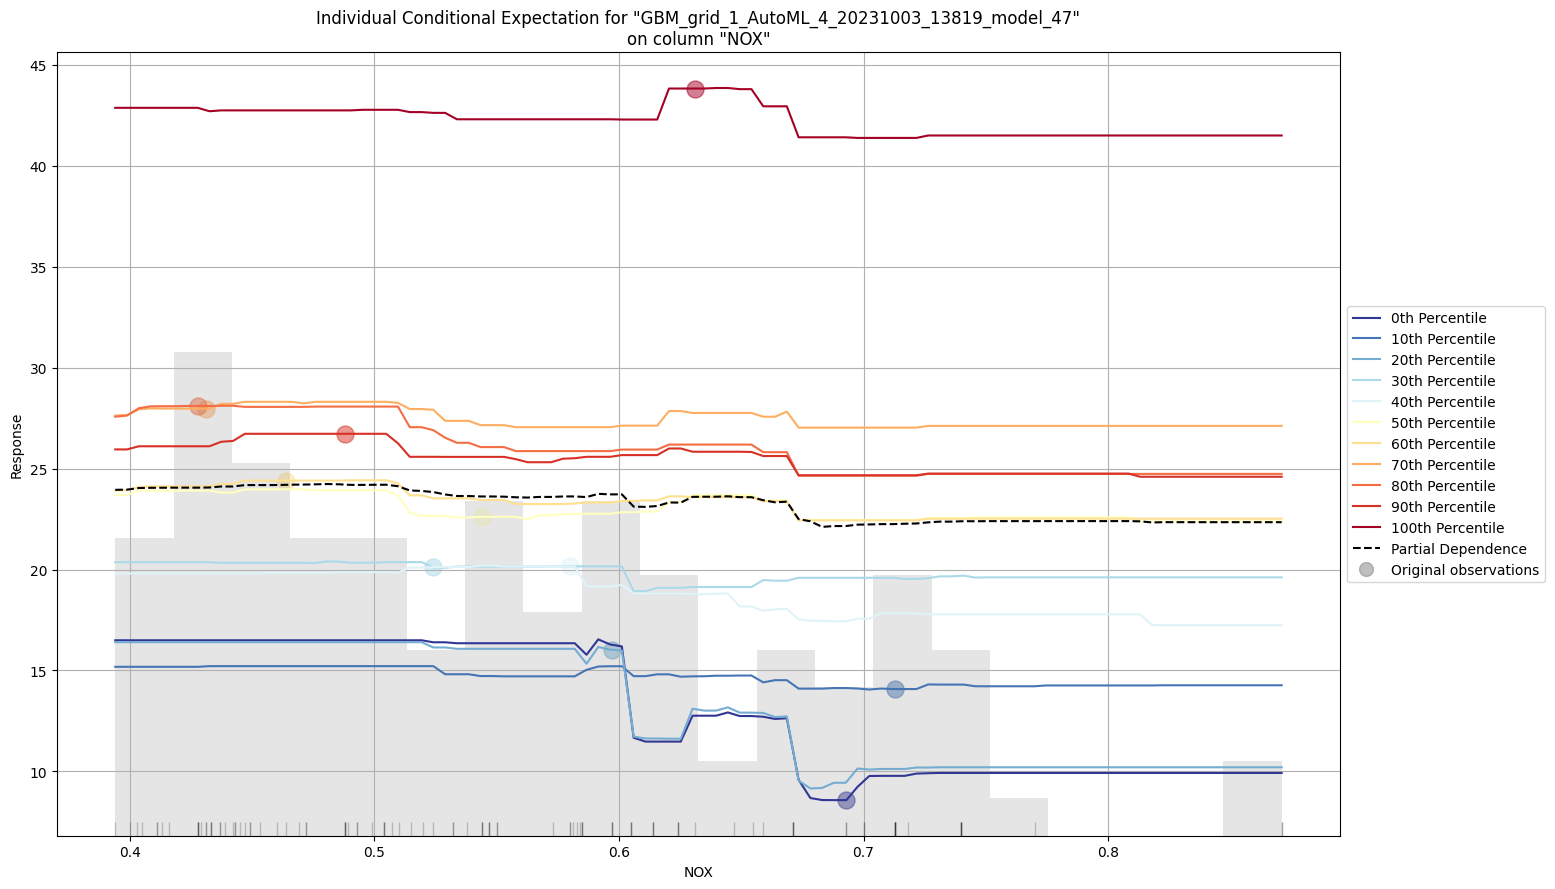

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [84]:
autoML_model.explain(autoML[1])

#CONCLUSION

SHAP and PDP are two techniques used to gain insights into how a model works. While PDP provides a global understanding of how the model behaves with respect to a specific feature, SHAP provides a more granular and individualized understanding of feature importance by considering interactions between features. The Stacked Ensemble model, which combines a GLM metalearner with a Deep Learning model and a GLM model, was selected as the best model by AutoML based on its low RMSE value. This model combines predictions from multiple models trained on the same dataset, and the final prediction can be made using various methods such as averaging or using a meta-model.
PDP shows how the predicted outcome of a model changes as a specific feature varies while holding all other features constant. PDPs visualize the average response of the model over the range of values for a given feature, giving an idea of the shape of the relationship between the feature and the model output.

While both techniques can be used to gain insights into how a model works, SHAP analysis provides a more granular and individualized understanding of feature importance, taking into account the interactions between features. PDPs, on the other hand, provide a more global and average understanding of how the model behaves with respect to a specific feature.In shap analysis, The features are comparatively constant whereas in partial dependency plots, the mean response of price is going from the range of 0 to 0.1.

Based on how well the Stacked Ensemble model performed, AutoML decided that it was the best model.A GLM metalearner and two base models—one Deep Learning model and one GLM model—combine to form the Stacked Ensemble model. Its low RMSE value in comparison to others may be one of the factors that led to its selection as the best model.

The Stacked Ensemble model has been shown to be the most efficient method for combining the predictions of various models for the particular job at hand by the automated process. A final prediction is made by merging the predictions of the several models that were trained on the same dataset to create the stacked ensemble model. Combining them can be done in various ways, such as averaging the predictions, using a weighted average, or using a more complex meta-model to make the final prediction.


References
H2O AutoML - https://docs.h2o.ai/

https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

http://net-informations.com/ds/mla/ols.html

https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

MIT License Copyright (c) 2023 Niharika Karri

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE